Connected to Python 3.9.6

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

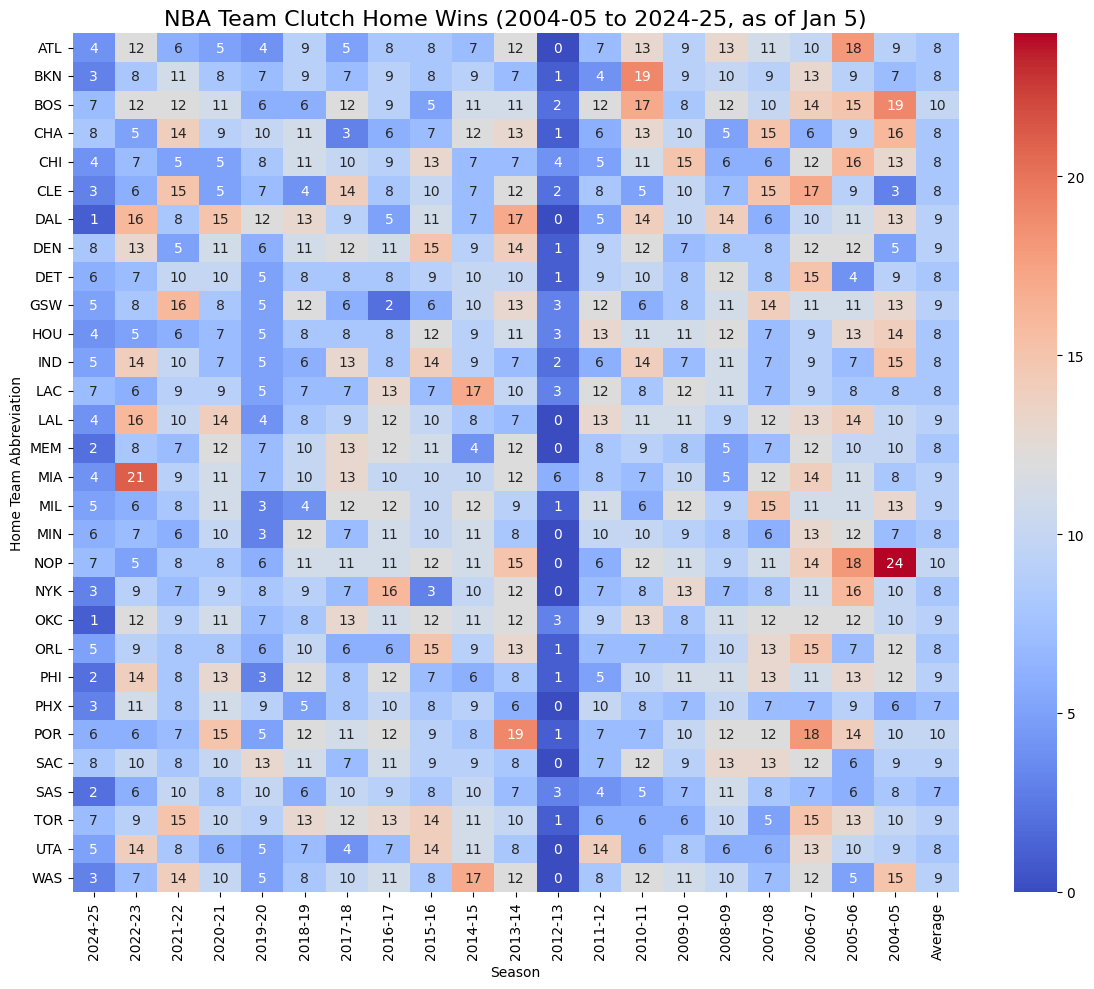

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
# Check the 2012 data in the game_data
season_2012_data_game = game_data[game_data['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season in game_data: {len(season_2012_data_game)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data_game.tail())

# Sum all of the team home wins for the 2012-13 season
total_home_wins_2012_game = season_2012_data_game['win'].sum()

# Print the total number of home wins for the 2012-13 season
print(f"Total home wins for the 2012-13 season in game_data: {total_home_wins_2012_game}")

KeyError: 'season'

In [ ]:
# Check the 2012 data in the table
season_2012_data = table[table['season'] == '2012-13']

# Print the number of rows for the 2012 season
print(f"Number of rows for the 2012-13 season: {len(season_2012_data)}")

# Display the first few rows of the 2012-13 season data
print(season_2012_data.tail())

# Sum all of the team home wins for the 2012-13 season
total_home_wins_2012 = season_2012_data['win'].sum()

# Print the total number of home wins for the 2012-13 season
print(f"Total home wins for the 2012-13 season: {total_home_wins_2012}")

: 

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

: 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

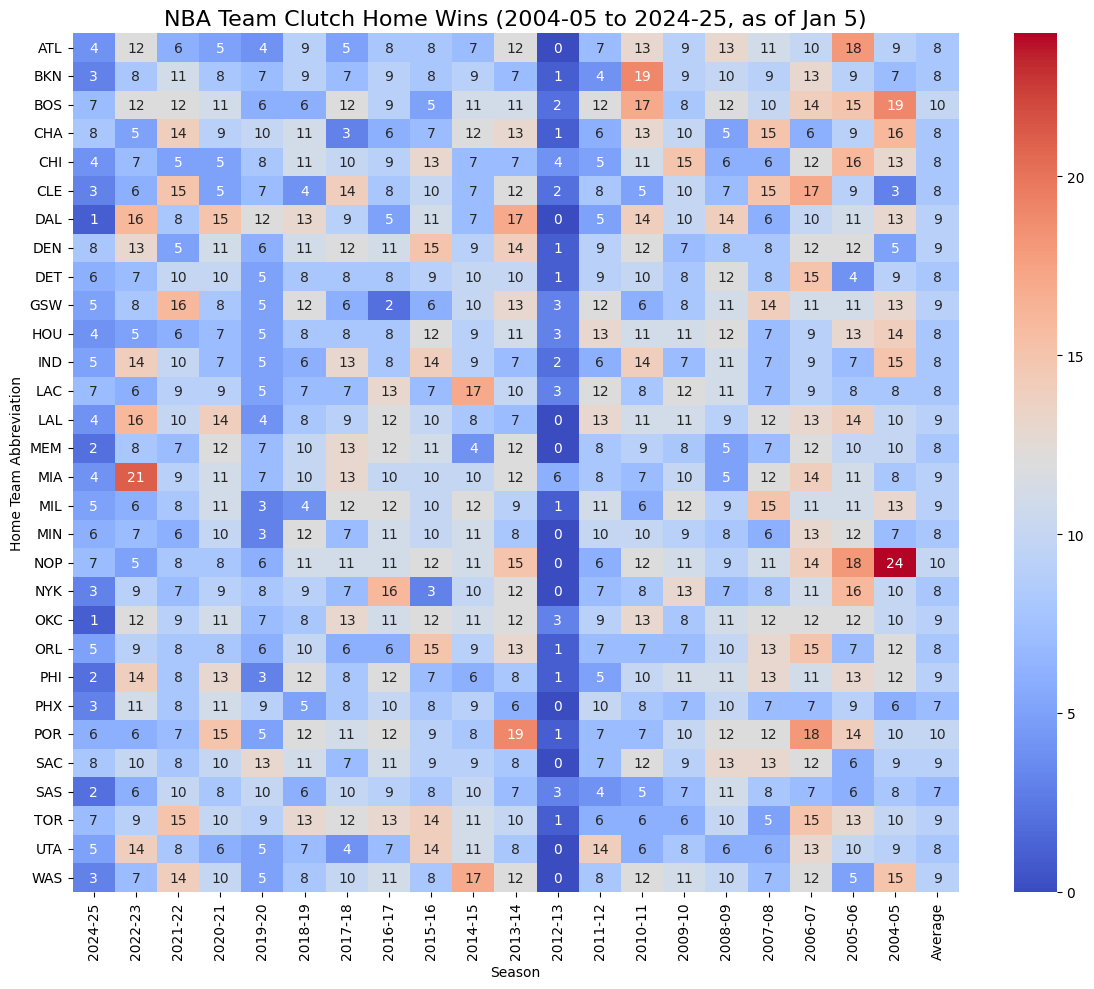

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20     971
2020-21    1376
2021-22    1392
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

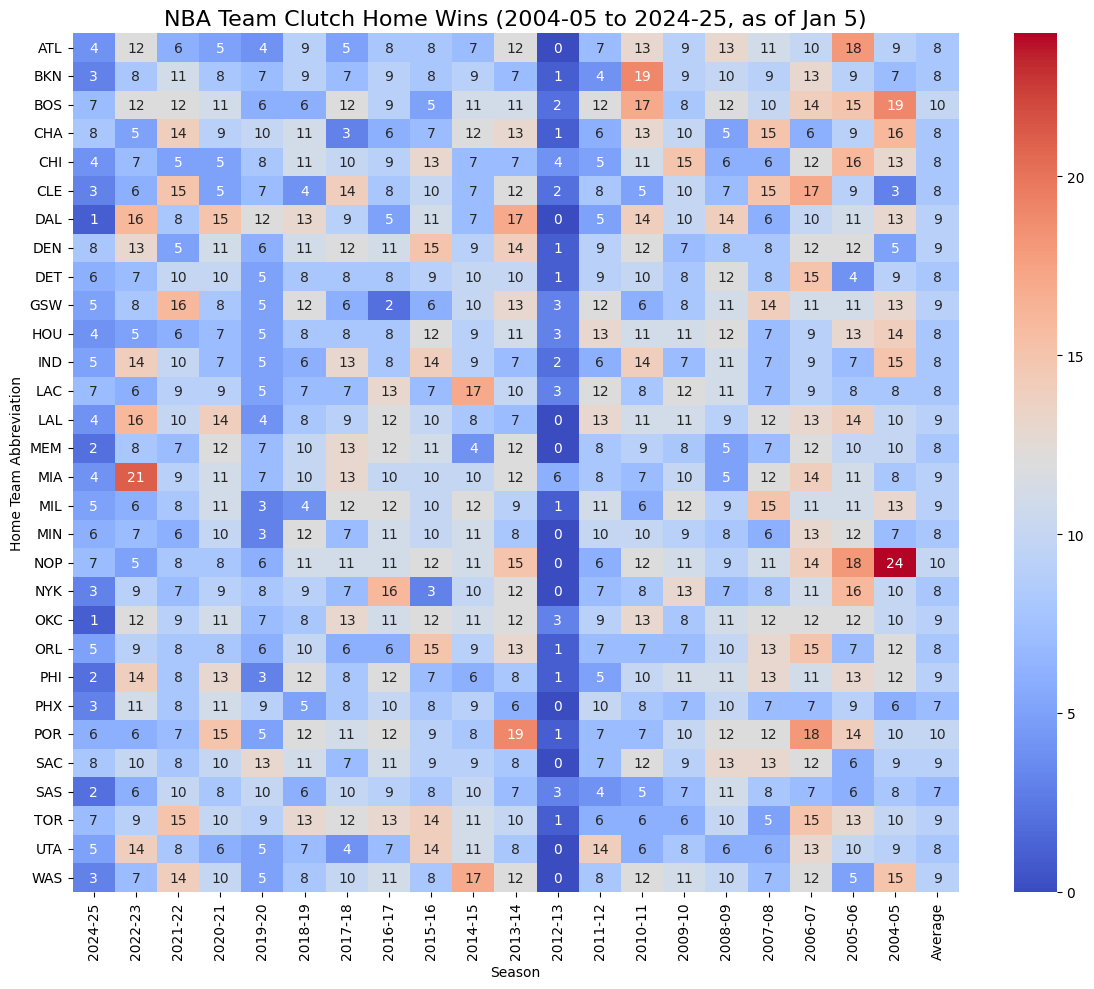

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20     971
2020-21    1376
2021-22    1392
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

AttributeError: 'str' object has no attribute 'year'

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

KeyError: 'season'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

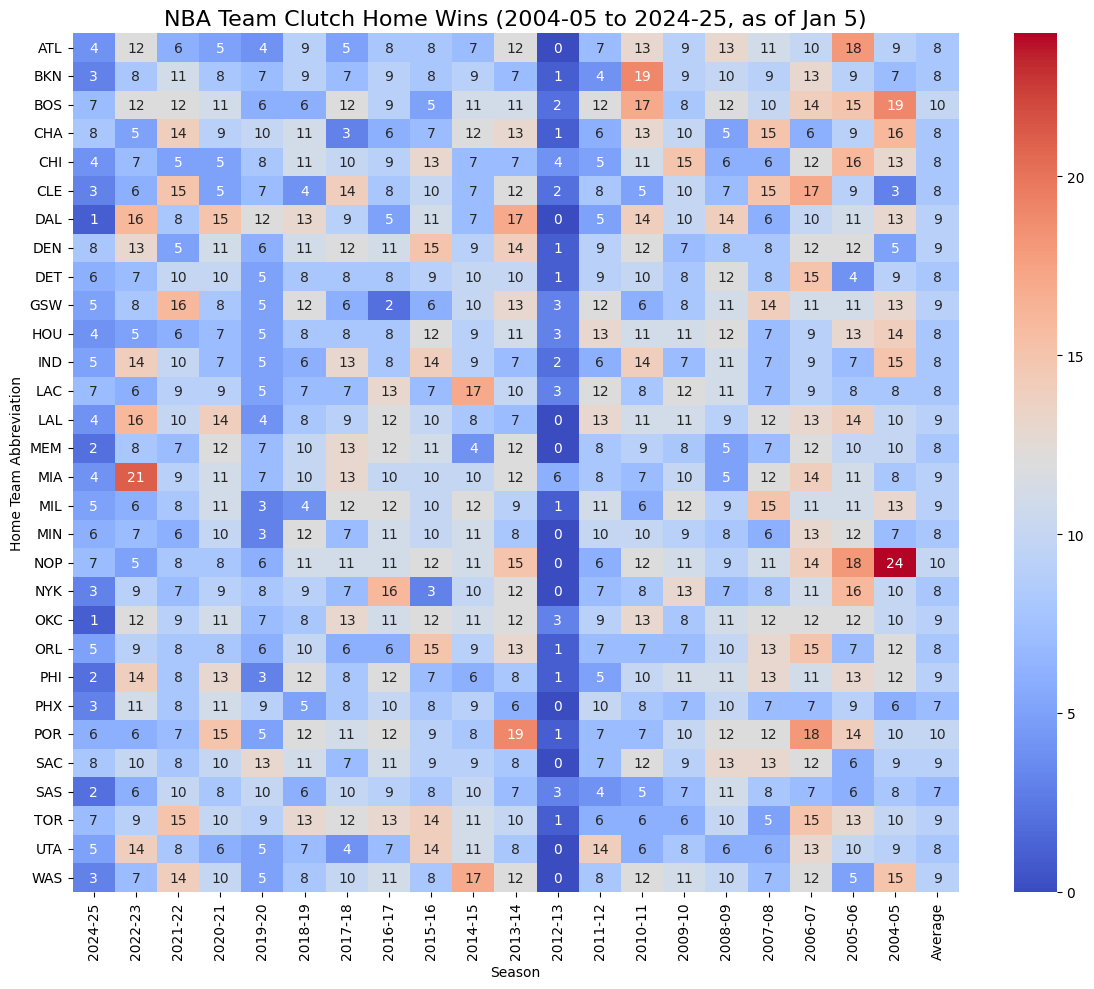

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20     971
2020-21    1376
2021-22    1392
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
# Filter for rows where 'season' is 'nan-an'
nan_an_season_games = game_data_filtered[game_data_filtered['season'] == 'nan-an']

# Display the tail of the DataFrame
print(nan_an_season_games.tail())

         gameId gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
64447  24600083      NaT      New York       Knicks  1610612752        Boston   
64448  24600078      NaT        Boston      Celtics  1610612738      New York   
64449  24600076      NaT  Philadelphia     Warriors  1610612744      New York   
64450  24600063      NaT      New York       Knicks  1610612752  Philadelphia   
64451  24600052      NaT  Philadelphia     Warriors  1610612744        Boston   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
64447      Celtics  1610612738         62         44                 18   
64448       Knicks  1610612752         65         90                -25   
64449       Knicks  1610612752         62         51                 11   
64450     Warriors  1610612744         64         60                  4   
64451      Celtics  1610612738         66         54                 12   

       season  
64447  nan-an  
64448  nan-an  
64449  nan-an 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

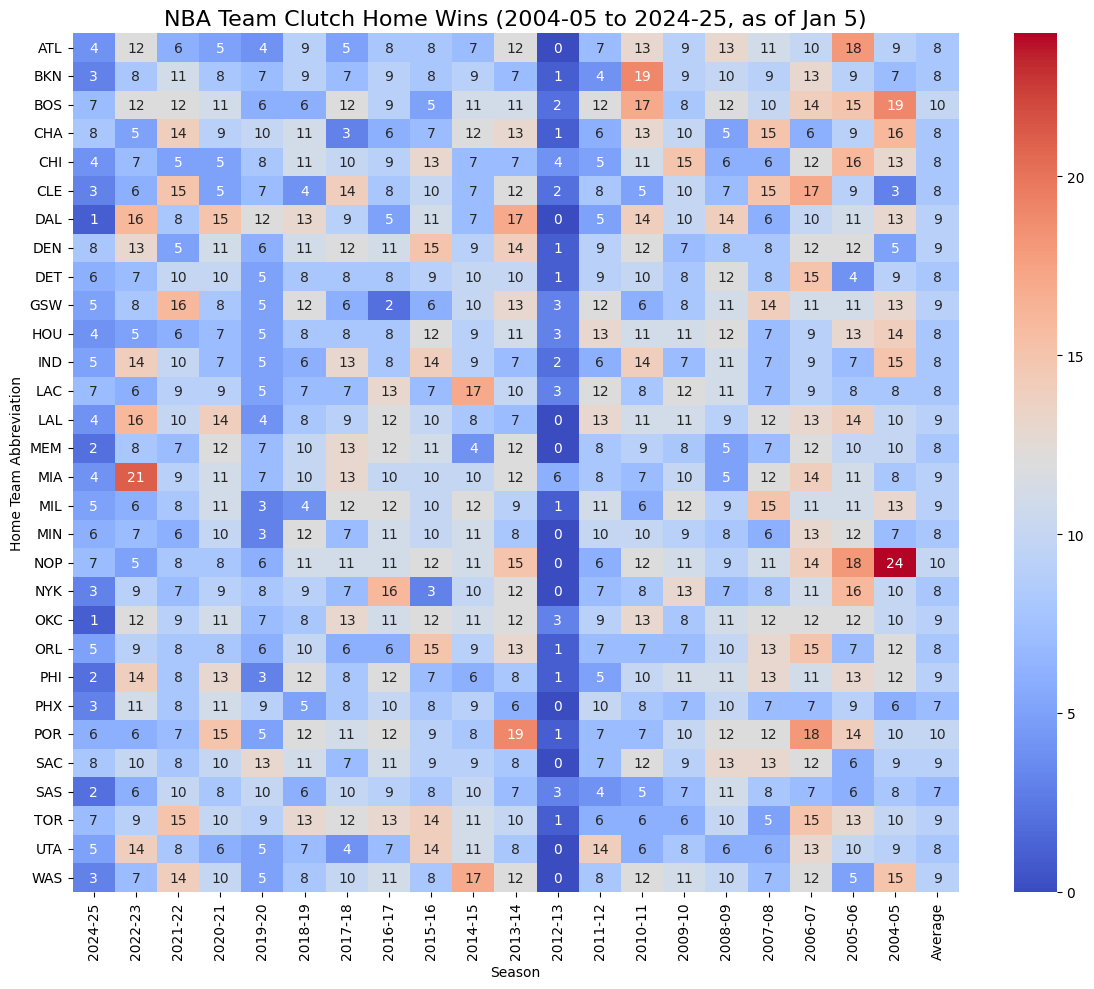

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20     971
2020-21    1376
2021-22    1392
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
# Filter for rows where 'season' is 'nan-an'
nan_an_season_games = game_data_filtered[game_data_filtered['season'] == 'nan-an']

# Display the tail of the DataFrame
print(nan_an_season_games.head())

         gameId gameDate       hometeamCity hometeamName  hometeamId  \
63114  25400116      NaT        Minneapolis       Lakers  1610612747   
63115  25400115      NaT  Ft. Wayne Zollner      Pistons  1610612765   
63116  25400114      NaT           Syracuse    Nationals  1610612755   
63117  25400113      NaT             Boston      Celtics  1610612738   
63118  25400112      NaT        Minneapolis       Lakers  1610612747   

       awayteamCity awayteamName  awayteamId  homeScore  awayScore  \
63114  Philadelphia     Warriors  1610612744         76         74   
63115  Philadelphia     Warriors  1610612744         89         66   
63116     St. Louis        Hawks  1610612737         79         91   
63117      New York       Knicks  1610612752        113         96   
63118     Rochester       Royals  1610612758        100        102   

       pointDifferential  season  
63114                  2  nan-an  
63115                 23  nan-an  
63116                -12  nan-an  
63117 

In [ ]:
# Filter for rows where 'season' is 'nan-an'
nan_an_season_games = game_data_filtered[game_data_filtered['season'] == 'nan-an']

# Display the tail of the DataFrame
print(nan_an_season_games.tail())

         gameId gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
64447  24600083      NaT      New York       Knicks  1610612752        Boston   
64448  24600078      NaT        Boston      Celtics  1610612738      New York   
64449  24600076      NaT  Philadelphia     Warriors  1610612744      New York   
64450  24600063      NaT      New York       Knicks  1610612752  Philadelphia   
64451  24600052      NaT  Philadelphia     Warriors  1610612744        Boston   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
64447      Celtics  1610612738         62         44                 18   
64448       Knicks  1610612752         65         90                -25   
64449       Knicks  1610612752         62         51                 11   
64450     Warriors  1610612744         64         60                  4   
64451      Celtics  1610612738         66         54                 12   

       season  
64447  nan-an  
64448  nan-an  
64449  nan-an 

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

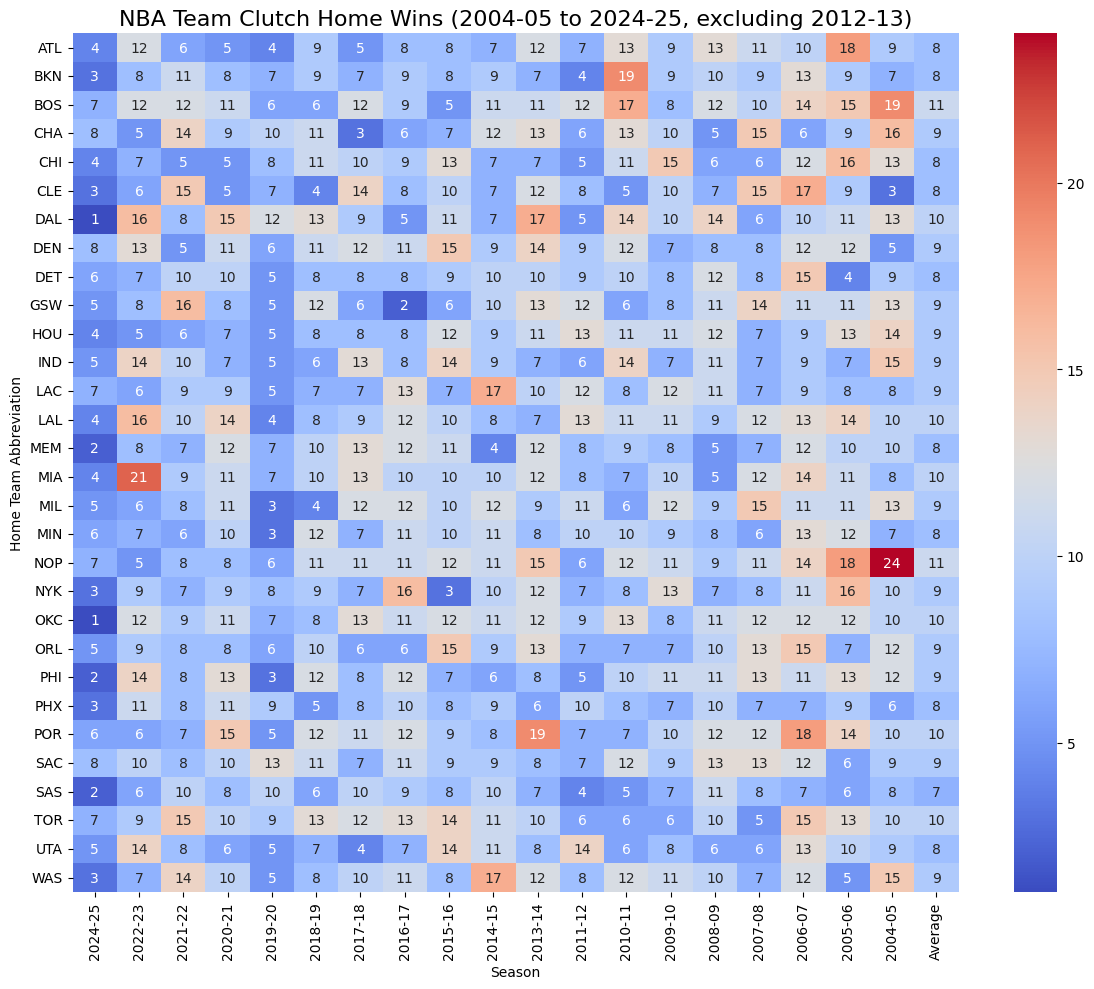

In [ ]:
# Exclude the 2012-13 season
table_excluded = table[table['season'] != '2012-13']

# Create a pivot table for the heatmap excluding the 2012-13 season
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt_excluded = pt_excluded[sorted(pt_excluded.columns, reverse=True)]

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

season          2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
hometeamAbbrev                                                                  
ATL                   9       18       10       11       13        9       13   
BKN                   7        9       13        9       10        9       19   
BOS                  19       15       14       10       12        8       17   
CHA                  16        9        6       15        5       10       13   
CHI                  13       16       12        6        6       15       11   
CLE                   3        9       17       15        7       10        5   
DAL                  13       11       10        6       14       10       14   
DEN                   5       12       12        8        8        7       12   
DET                   9        4       15        8       12        8       10   
GSW                  13       11       11       14       11        8        6   
HOU                  14     

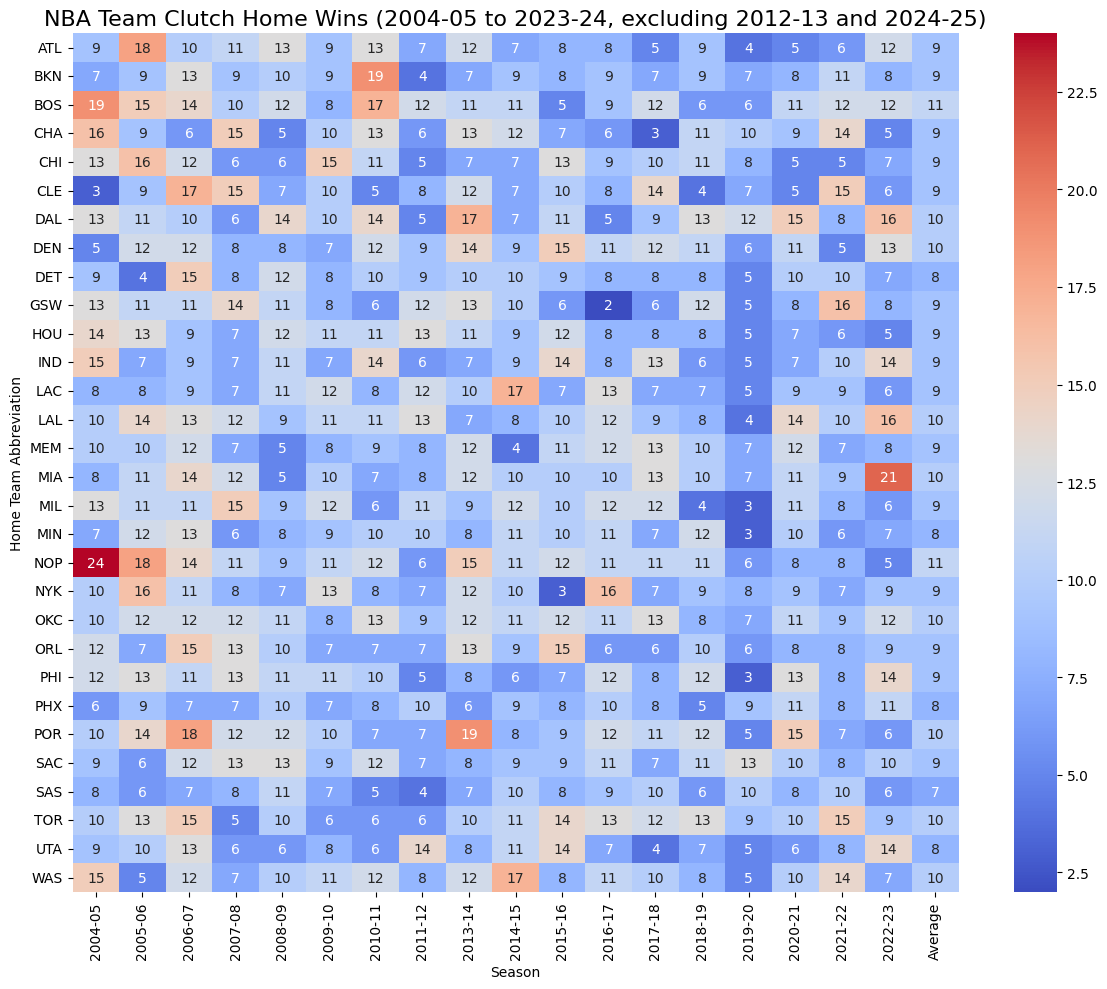

In [ ]:
# Exclude the 2012-13 and 2024-25 seasons
table_excluded = table[(table['season'] != '2012-13') & (table['season'] != '2024-25')]

# Create a pivot table for the heatmap excluding the 2012-13 and 2024-25 seasons
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt_excluded = pt_excluded[sorted(pt_excluded.columns)]

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2023-24, excluding 2012-13 and 2024-25)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

season          2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
hometeamAbbrev                                                                  
ATL                   9       18       10       11       13        9       13   
BKN                   7        9       13        9       10        9       19   
BOS                  19       15       14       10       12        8       17   
CHA                  16        9        6       15        5       10       13   
CHI                  13       16       12        6        6       15       11   
CLE                   3        9       17       15        7       10        5   
DAL                  13       11       10        6       14       10       14   
DEN                   5       12       12        8        8        7       12   
DET                   9        4       15        8       12        8       10   
GSW                  13       11       11       14       11        8        6   
HOU                  14     

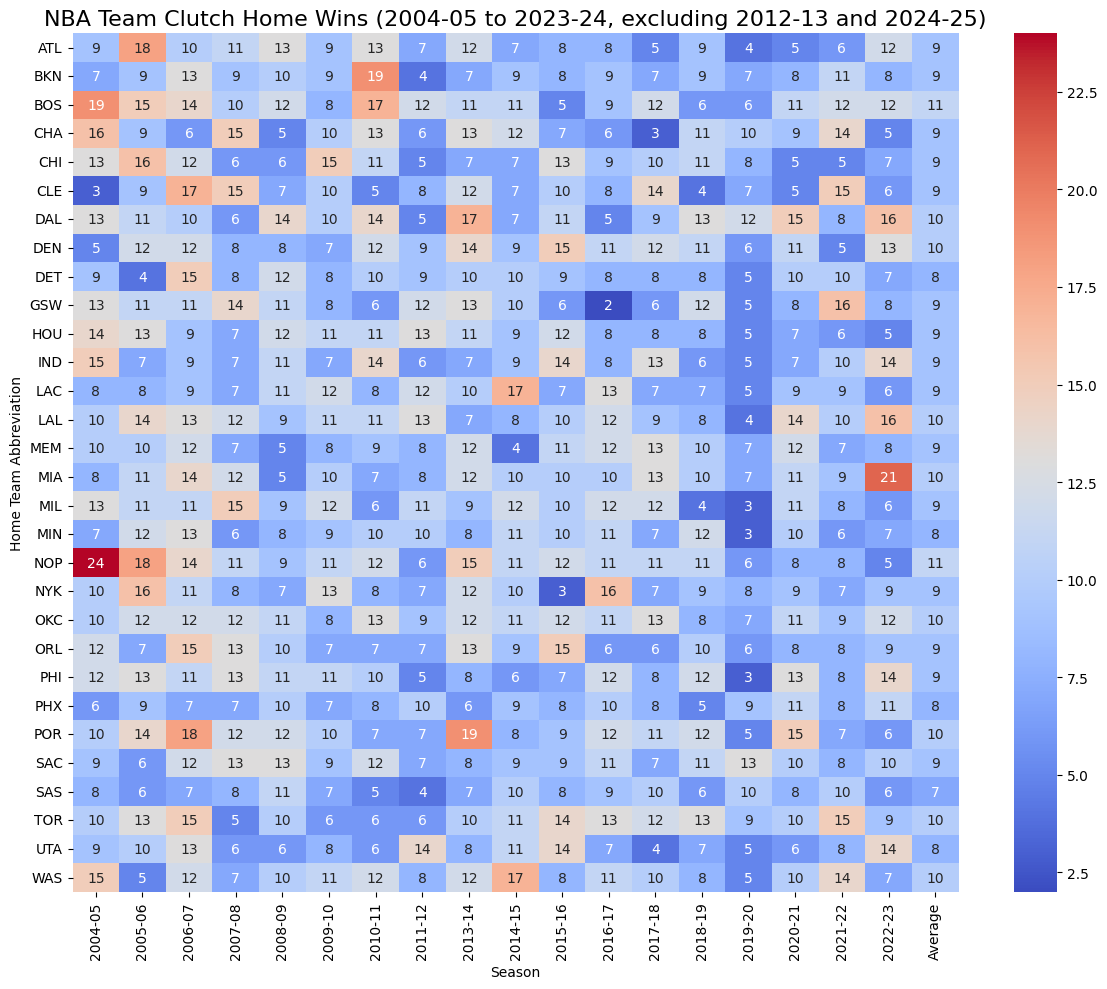

In [ ]:
# Exclude the 2012-13 and 2024-25 seasons
table_excluded = table[(table['season'] != '2012-13') & (table['season'] != '2024-25')]

# Create a pivot table for the heatmap excluding the 2012-13 and 2024-25 seasons
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2023-24, excluding 2012-13 and 2024-25)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

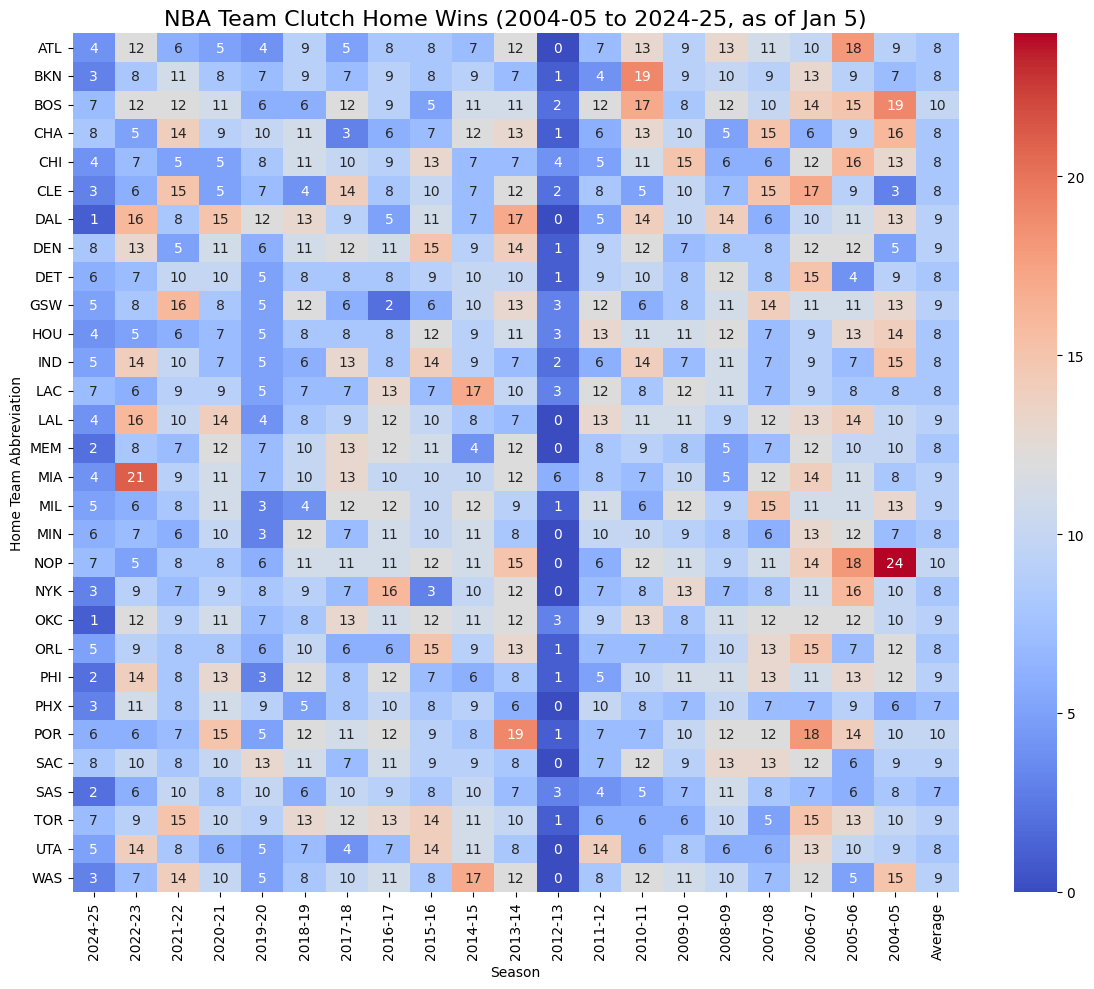

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20     971
2020-21    1376
2021-22    1392
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
# Filter for rows where 'season' is 'nan-an'
nan_an_season_games = game_data_filtered[game_data_filtered['season'] == 'nan-an']

# Display the tail of the DataFrame
print(nan_an_season_games.tail())
# it isn't that the 12-13 games are being put into nan-an. I wonder why they are missing.

#  it is simply missing in the dataset! I can't fix this. I can only work with the data I have.

         gameId gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
64447  24600083      NaT      New York       Knicks  1610612752        Boston   
64448  24600078      NaT        Boston      Celtics  1610612738      New York   
64449  24600076      NaT  Philadelphia     Warriors  1610612744      New York   
64450  24600063      NaT      New York       Knicks  1610612752  Philadelphia   
64451  24600052      NaT  Philadelphia     Warriors  1610612744        Boston   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
64447      Celtics  1610612738         62         44                 18   
64448       Knicks  1610612752         65         90                -25   
64449       Knicks  1610612752         62         51                 11   
64450     Warriors  1610612744         64         60                  4   
64451      Celtics  1610612738         66         54                 12   

       season  
64447  nan-an  
64448  nan-an  
64449  nan-an 

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

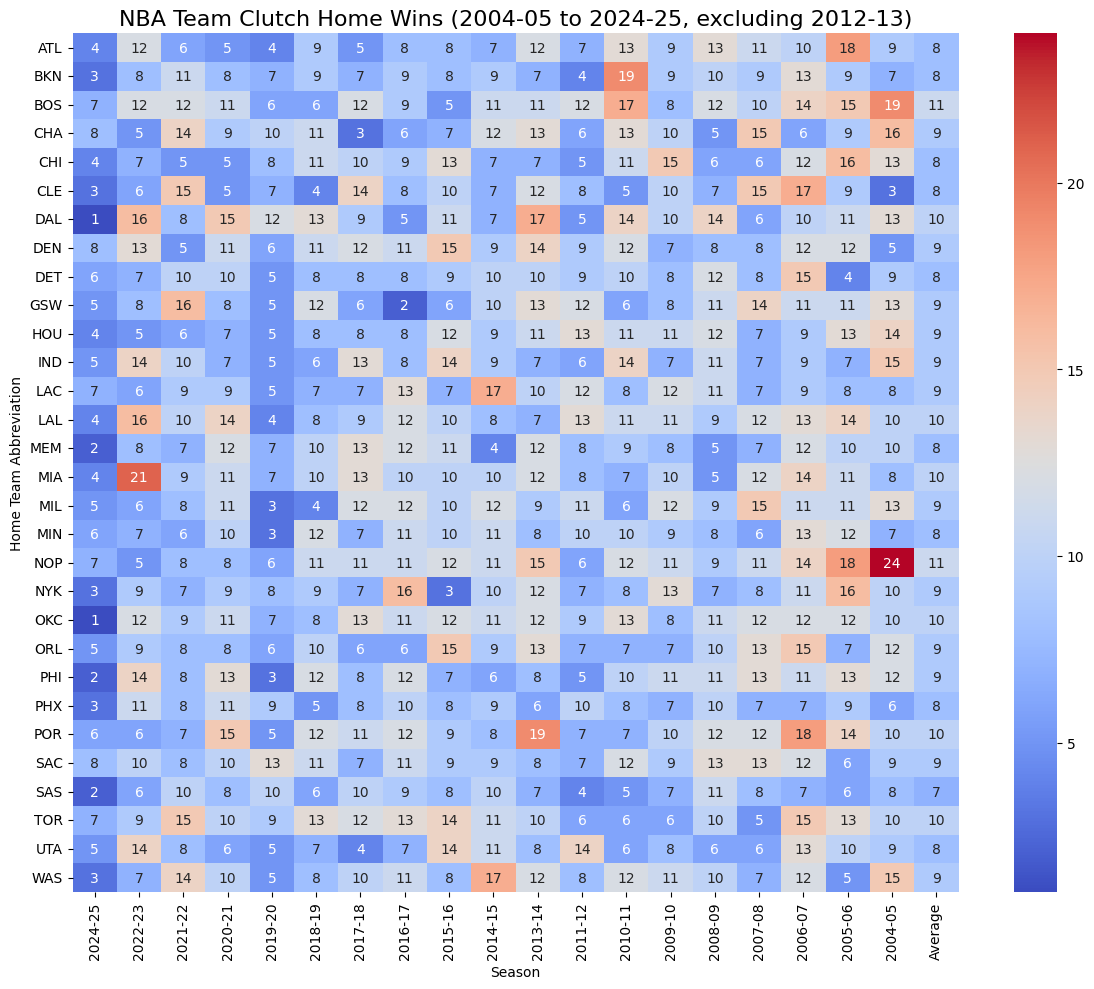

In [ ]:
# Exclude the 2012-13 season
table_excluded = table[table['season'] != '2012-13']

# Create a pivot table for the heatmap excluding the 2012-13 season
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt_excluded = pt_excluded[sorted(pt_excluded.columns, reverse=True)]

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

In [ ]:
# Filter for 2004-05 season and NOP home games
nop_2004_05_clutch_home_wins = table[(table['season'] == '2004-05') & (table['hometeamAbbrev'] == 'NOP') & (table['win'] == 1)]

# Display the result
print(nop_2004_05_clutch_home_wins)

         gameId   gameDate   hometeamCity hometeamName  hometeamId  \
24374  20400917 2005-03-13    New Orleans      Hornets  1610612740   
24375  20400917 2005-03-13  Oklahoma City      Hornets  1610612740   
24540  20400760 2005-02-15    New Orleans      Hornets  1610612740   
24541  20400760 2005-02-15  Oklahoma City      Hornets  1610612740   
24564  20400738 2005-02-12    New Orleans      Hornets  1610612740   
24565  20400738 2005-02-12  Oklahoma City      Hornets  1610612740   
24678  20400632 2005-01-29    New Orleans      Hornets  1610612740   
24679  20400632 2005-01-29  Oklahoma City      Hornets  1610612740   
24725  20400588 2005-01-23  Oklahoma City      Hornets  1610612740   
24726  20400588 2005-01-23    New Orleans      Hornets  1610612740   
24749  20400565 2005-01-20    New Orleans      Hornets  1610612740   
24750  20400565 2005-01-20  Oklahoma City      Hornets  1610612740   
24838  20400483 2005-01-09    New Orleans      Hornets  1610612740   
24839  20400483 2005

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

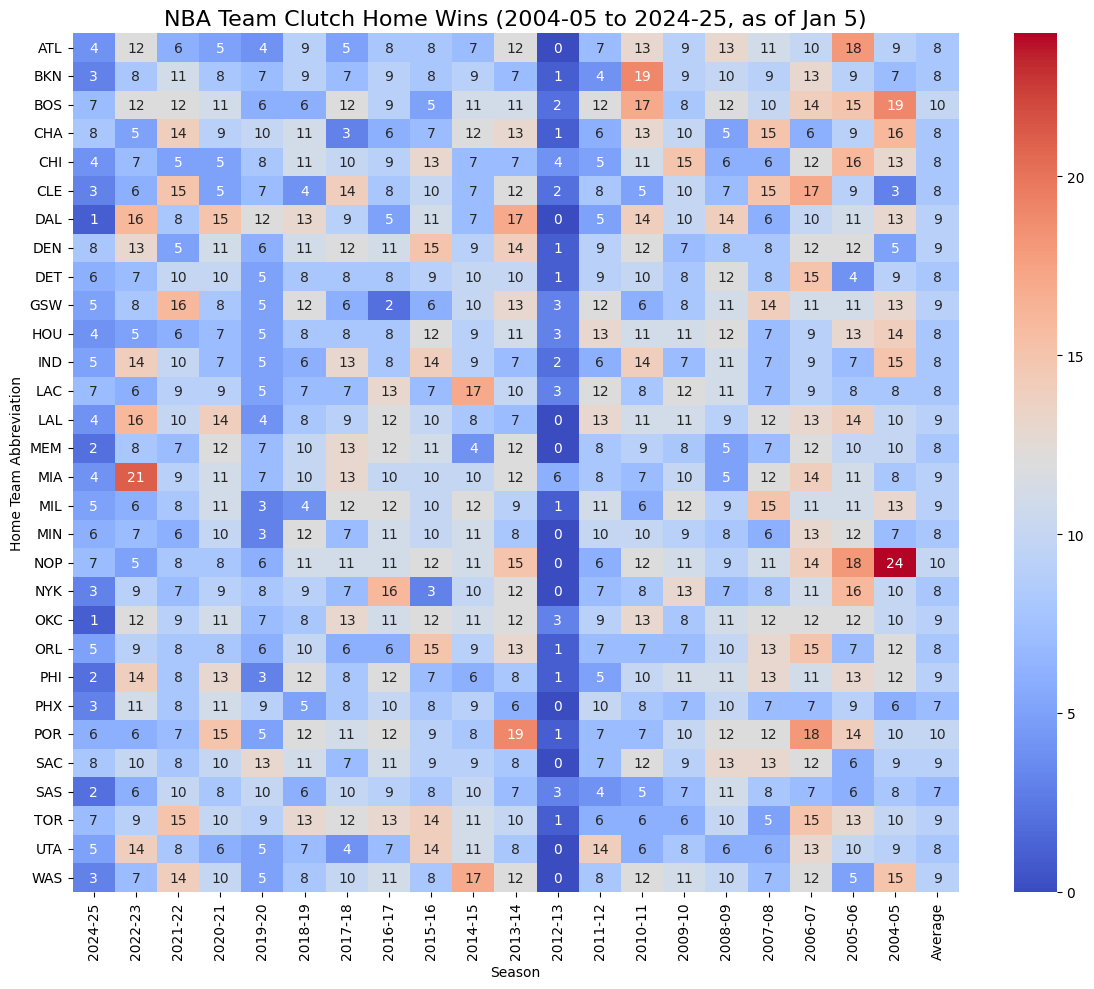

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20     971
2020-21    1376
2021-22    1392
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
# Filter for rows where 'season' is 'nan-an'
nan_an_season_games = game_data_filtered[game_data_filtered['season'] == 'nan-an']

# Display the tail of the DataFrame
print(nan_an_season_games.tail())
# it isn't that the 12-13 games are being put into nan-an. I wonder why they are missing.

#  it is simply missing in the dataset! I can't fix this. I can only work with the data I have.

         gameId gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
64447  24600083      NaT      New York       Knicks  1610612752        Boston   
64448  24600078      NaT        Boston      Celtics  1610612738      New York   
64449  24600076      NaT  Philadelphia     Warriors  1610612744      New York   
64450  24600063      NaT      New York       Knicks  1610612752  Philadelphia   
64451  24600052      NaT  Philadelphia     Warriors  1610612744        Boston   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
64447      Celtics  1610612738         62         44                 18   
64448       Knicks  1610612752         65         90                -25   
64449       Knicks  1610612752         62         51                 11   
64450     Warriors  1610612744         64         60                  4   
64451      Celtics  1610612738         66         54                 12   

       season  
64447  nan-an  
64448  nan-an  
64449  nan-an 

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

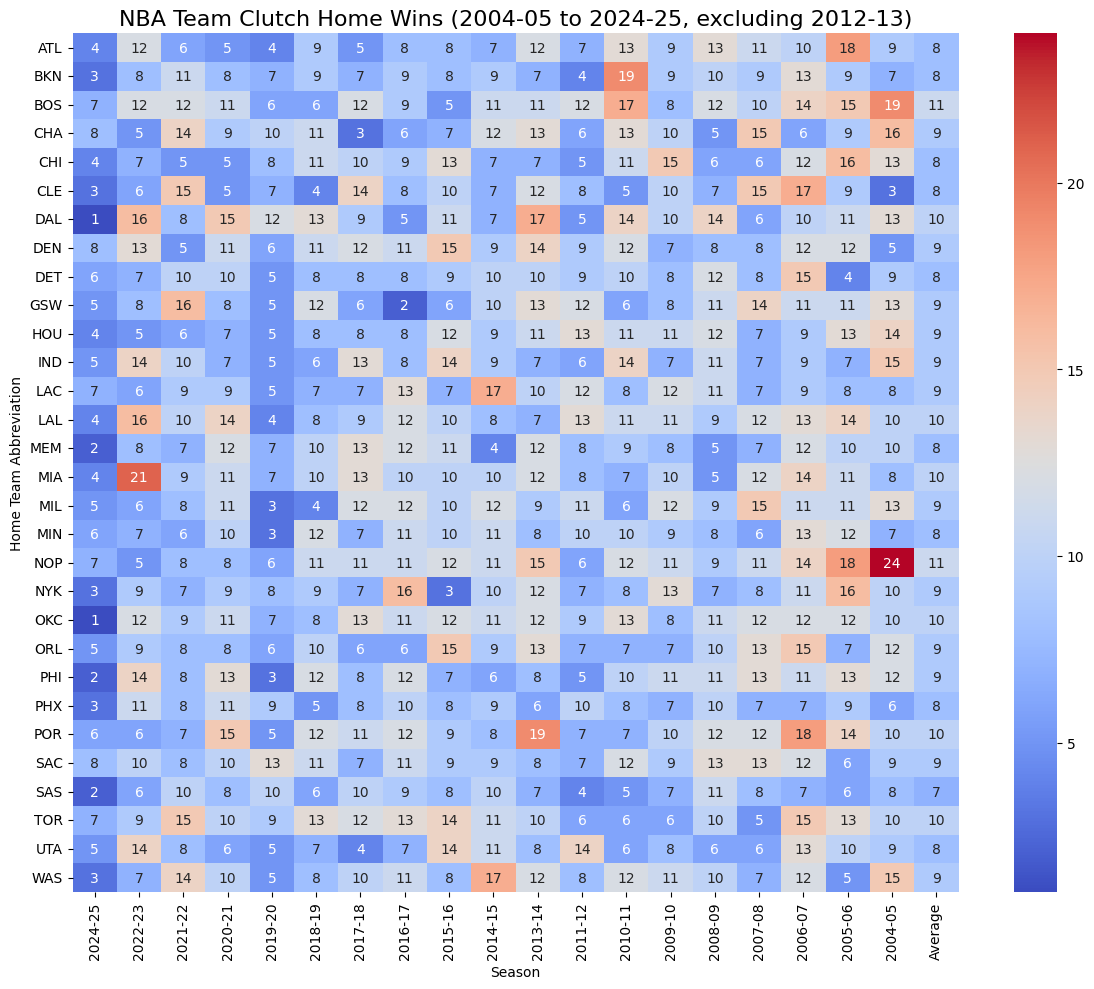

In [ ]:
# Exclude the 2012-13 season
table_excluded = table[table['season'] != '2012-13']

# Create a pivot table for the heatmap excluding the 2012-13 season
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt_excluded = pt_excluded[sorted(pt_excluded.columns, reverse=True)]

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

season          2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
hometeamAbbrev                                                                  
ATL                   9       18       10       11       13        9       13   
BKN                   7        9       13        9       10        9       19   
BOS                  19       15       14       10       12        8       17   
CHA                  16        9        6       15        5       10       13   
CHI                  13       16       12        6        6       15       11   
CLE                   3        9       17       15        7       10        5   
DAL                  13       11       10        6       14       10       14   
DEN                   5       12       12        8        8        7       12   
DET                   9        4       15        8       12        8       10   
GSW                  13       11       11       14       11        8        6   
HOU                  14     

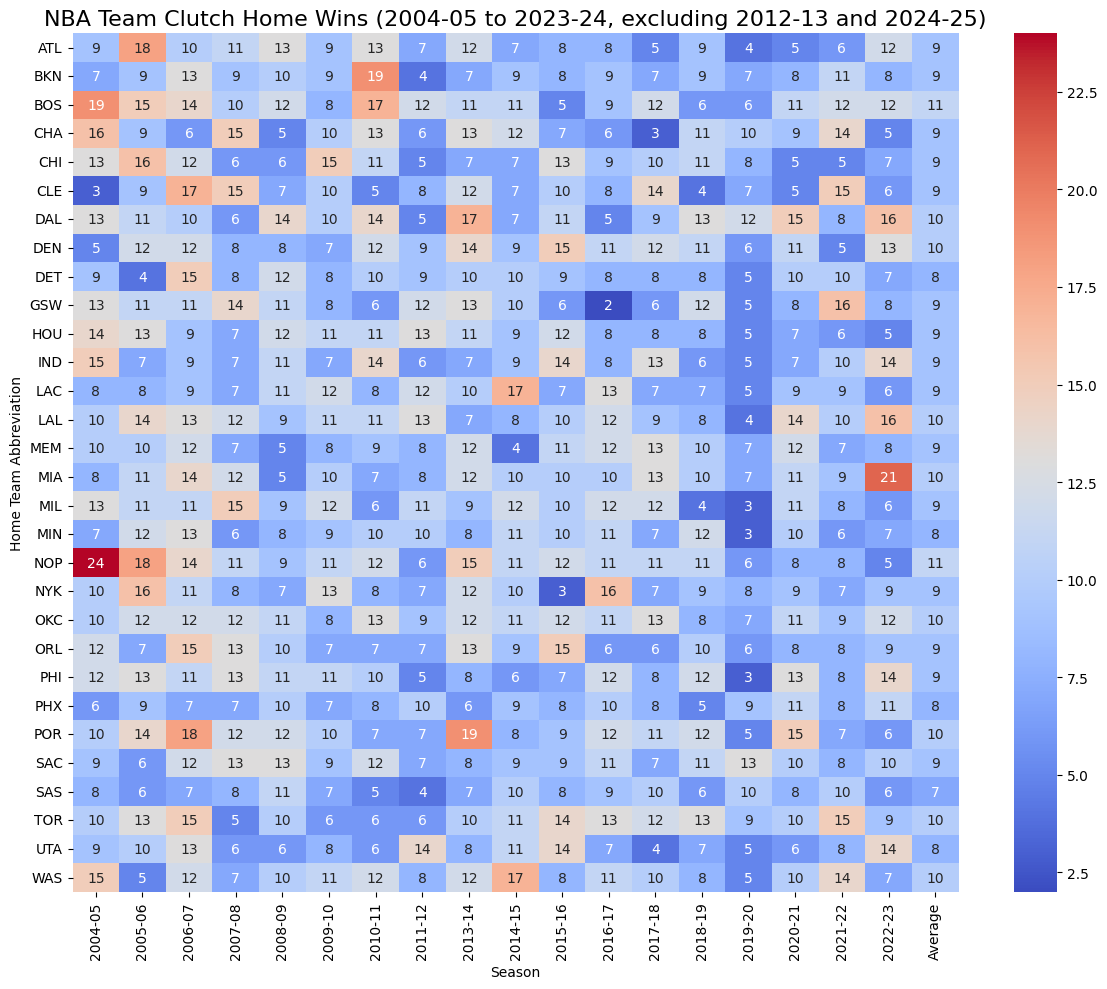

In [ ]:
# Exclude the 2012-13 and 2024-25 seasons
table_excluded = table[(table['season'] != '2012-13') & (table['season'] != '2024-25')]

# Create a pivot table for the heatmap excluding the 2012-13 and 2024-25 seasons
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2023-24, excluding 2012-13 and 2024-25)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

In [ ]:
# Filter for 2004-05 season and NOP home games
nop_2004_05_clutch_home_wins = table[(table['season'] == '2004-05') & (table['hometeamAbbrev'] == 'NOP') & (table['win'] == 1)]

# Display the result
print(nop_2004_05_clutch_home_wins)

         gameId   gameDate   hometeamCity hometeamName  hometeamId  \
24374  20400917 2005-03-13    New Orleans      Hornets  1610612740   
24375  20400917 2005-03-13  Oklahoma City      Hornets  1610612740   
24540  20400760 2005-02-15    New Orleans      Hornets  1610612740   
24541  20400760 2005-02-15  Oklahoma City      Hornets  1610612740   
24564  20400738 2005-02-12    New Orleans      Hornets  1610612740   
24565  20400738 2005-02-12  Oklahoma City      Hornets  1610612740   
24678  20400632 2005-01-29    New Orleans      Hornets  1610612740   
24679  20400632 2005-01-29  Oklahoma City      Hornets  1610612740   
24725  20400588 2005-01-23  Oklahoma City      Hornets  1610612740   
24726  20400588 2005-01-23    New Orleans      Hornets  1610612740   
24749  20400565 2005-01-20    New Orleans      Hornets  1610612740   
24750  20400565 2005-01-20  Oklahoma City      Hornets  1610612740   
24838  20400483 2005-01-09    New Orleans      Hornets  1610612740   
24839  20400483 2005

In [ ]:
# Remove duplicate gameIDs from game_data_filtered
game_data_filtered = game_data_filtered.drop_duplicates(subset='gameId')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Assuming 'game_data' is your original DataFrame

# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

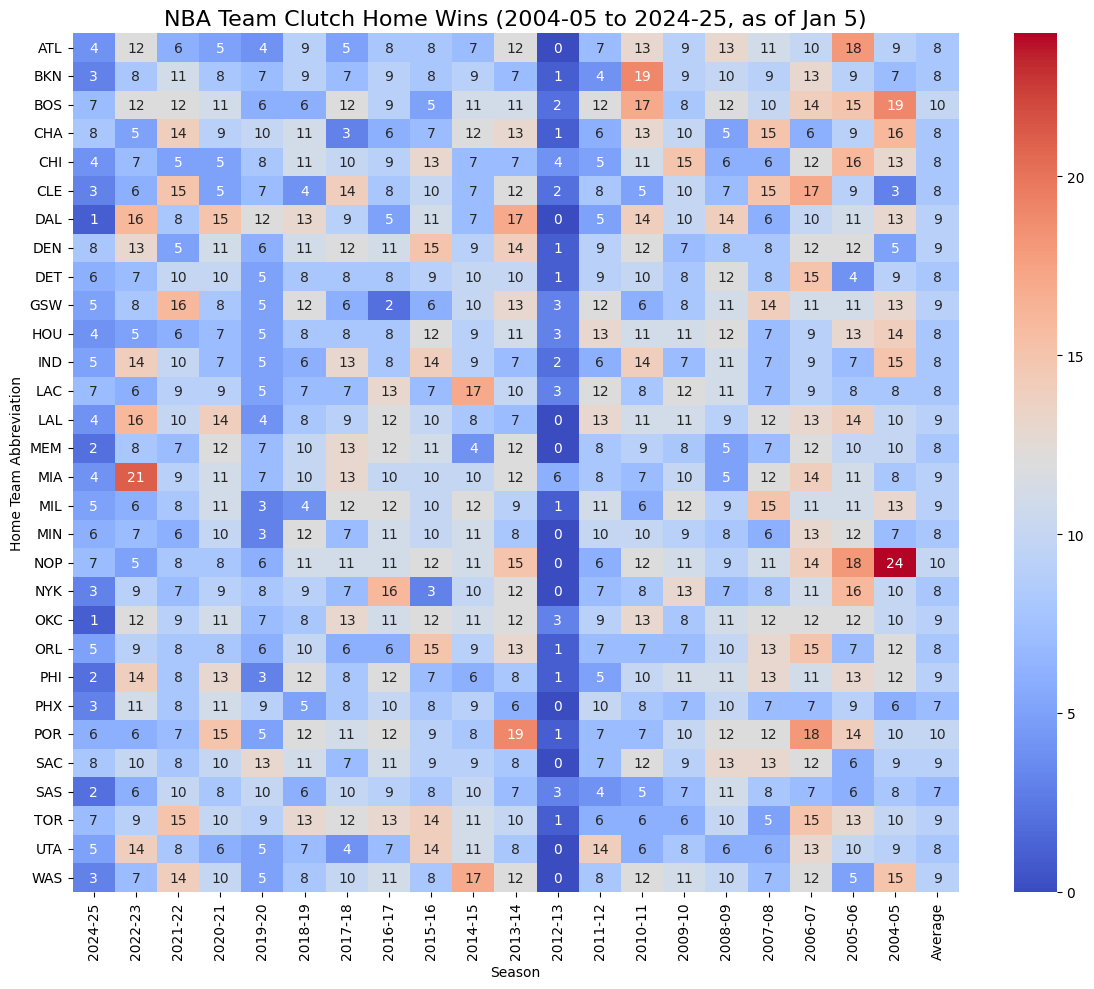

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
# Remove duplicate gameIDs from game_data_filtered
game_data_filtered = game_data_filtered.drop_duplicates(subset='gameId')

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20     971
2020-21    1376
2021-22    1392
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
# Filter for rows where 'season' is 'nan-an'
nan_an_season_games = game_data_filtered[game_data_filtered['season'] == 'nan-an']

# Display the tail of the DataFrame
print(nan_an_season_games.tail())
# it isn't that the 12-13 games are being put into nan-an. I wonder why they are missing.

#  it is simply missing in the dataset! I can't fix this. I can only work with the data I have.

         gameId gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
64447  24600083      NaT      New York       Knicks  1610612752        Boston   
64448  24600078      NaT        Boston      Celtics  1610612738      New York   
64449  24600076      NaT  Philadelphia     Warriors  1610612744      New York   
64450  24600063      NaT      New York       Knicks  1610612752  Philadelphia   
64451  24600052      NaT  Philadelphia     Warriors  1610612744        Boston   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
64447      Celtics  1610612738         62         44                 18   
64448       Knicks  1610612752         65         90                -25   
64449       Knicks  1610612752         62         51                 11   
64450     Warriors  1610612744         64         60                  4   
64451      Celtics  1610612738         66         54                 12   

       season  
64447  nan-an  
64448  nan-an  
64449  nan-an 

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

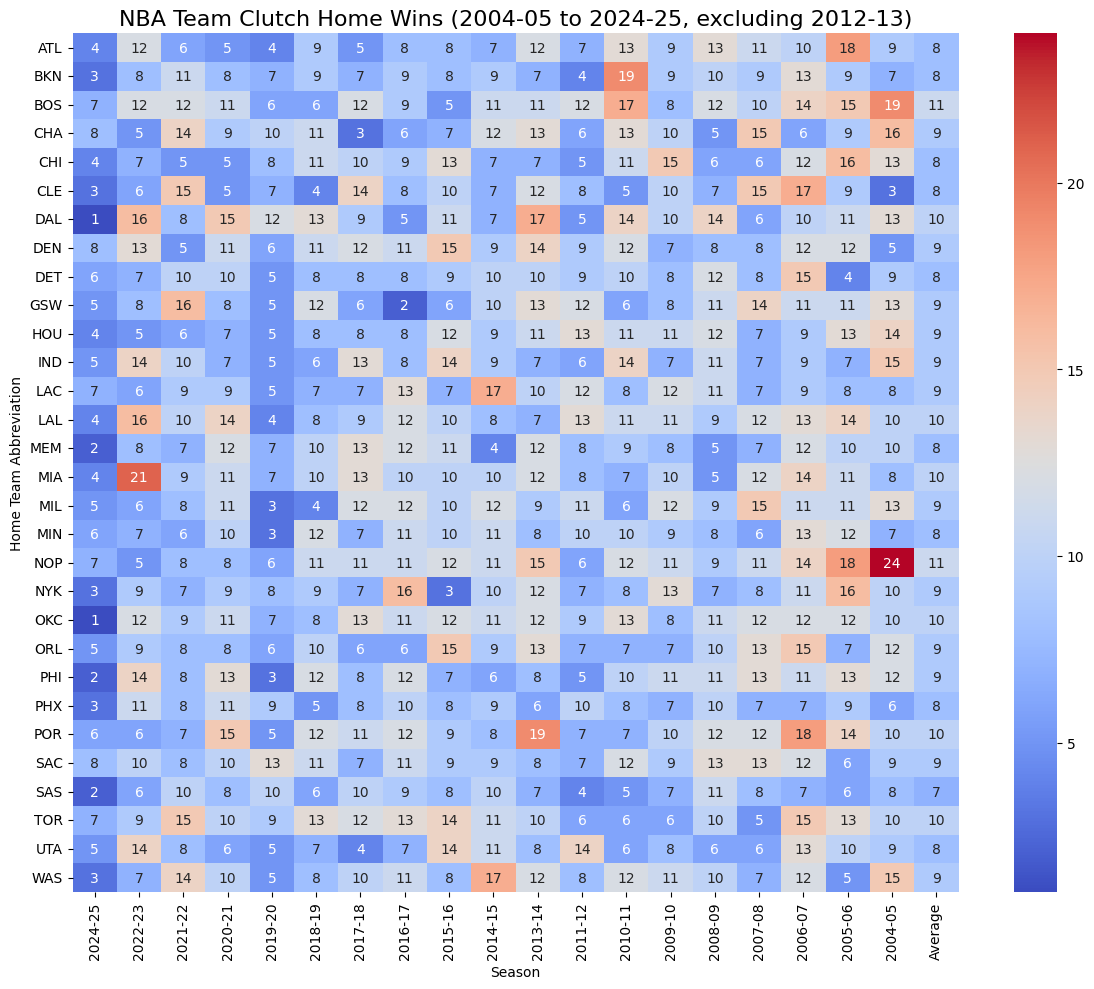

In [ ]:
# Exclude the 2012-13 season
table_excluded = table[table['season'] != '2012-13']

# Create a pivot table for the heatmap excluding the 2012-13 season
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt_excluded = pt_excluded[sorted(pt_excluded.columns, reverse=True)]

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

season          2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
hometeamAbbrev                                                                  
ATL                   9       18       10       11       13        9       13   
BKN                   7        9       13        9       10        9       19   
BOS                  19       15       14       10       12        8       17   
CHA                  16        9        6       15        5       10       13   
CHI                  13       16       12        6        6       15       11   
CLE                   3        9       17       15        7       10        5   
DAL                  13       11       10        6       14       10       14   
DEN                   5       12       12        8        8        7       12   
DET                   9        4       15        8       12        8       10   
GSW                  13       11       11       14       11        8        6   
HOU                  14     

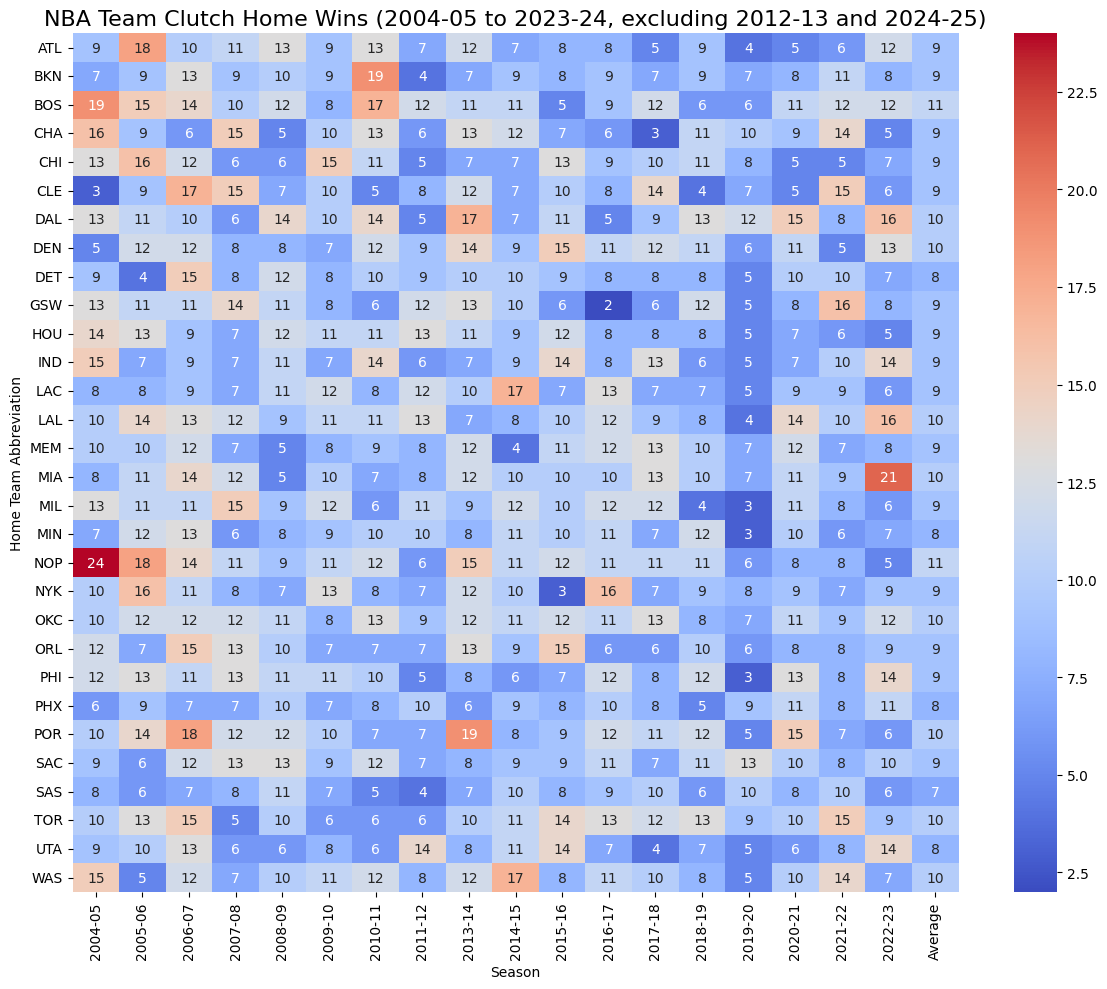

In [ ]:
# Exclude the 2012-13 and 2024-25 seasons
table_excluded = table[(table['season'] != '2012-13') & (table['season'] != '2024-25')]

# Create a pivot table for the heatmap excluding the 2012-13 and 2024-25 seasons
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2023-24, excluding 2012-13 and 2024-25)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

In [ ]:
# Filter for 2004-05 season and NOP home games
nop_2004_05_clutch_home_wins = table[(table['season'] == '2004-05') & (table['hometeamAbbrev'] == 'NOP') & (table['win'] == 1)]

# Display the result
print(nop_2004_05_clutch_home_wins)

         gameId   gameDate   hometeamCity hometeamName  hometeamId  \
24374  20400917 2005-03-13    New Orleans      Hornets  1610612740   
24375  20400917 2005-03-13  Oklahoma City      Hornets  1610612740   
24540  20400760 2005-02-15    New Orleans      Hornets  1610612740   
24541  20400760 2005-02-15  Oklahoma City      Hornets  1610612740   
24564  20400738 2005-02-12    New Orleans      Hornets  1610612740   
24565  20400738 2005-02-12  Oklahoma City      Hornets  1610612740   
24678  20400632 2005-01-29    New Orleans      Hornets  1610612740   
24679  20400632 2005-01-29  Oklahoma City      Hornets  1610612740   
24725  20400588 2005-01-23  Oklahoma City      Hornets  1610612740   
24726  20400588 2005-01-23    New Orleans      Hornets  1610612740   
24749  20400565 2005-01-20    New Orleans      Hornets  1610612740   
24750  20400565 2005-01-20  Oklahoma City      Hornets  1610612740   
24838  20400483 2005-01-09    New Orleans      Hornets  1610612740   
24839  20400483 2005

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Filter game_data for unique gameID values
game_data = game_data.drop_duplicates(subset='gameId')

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

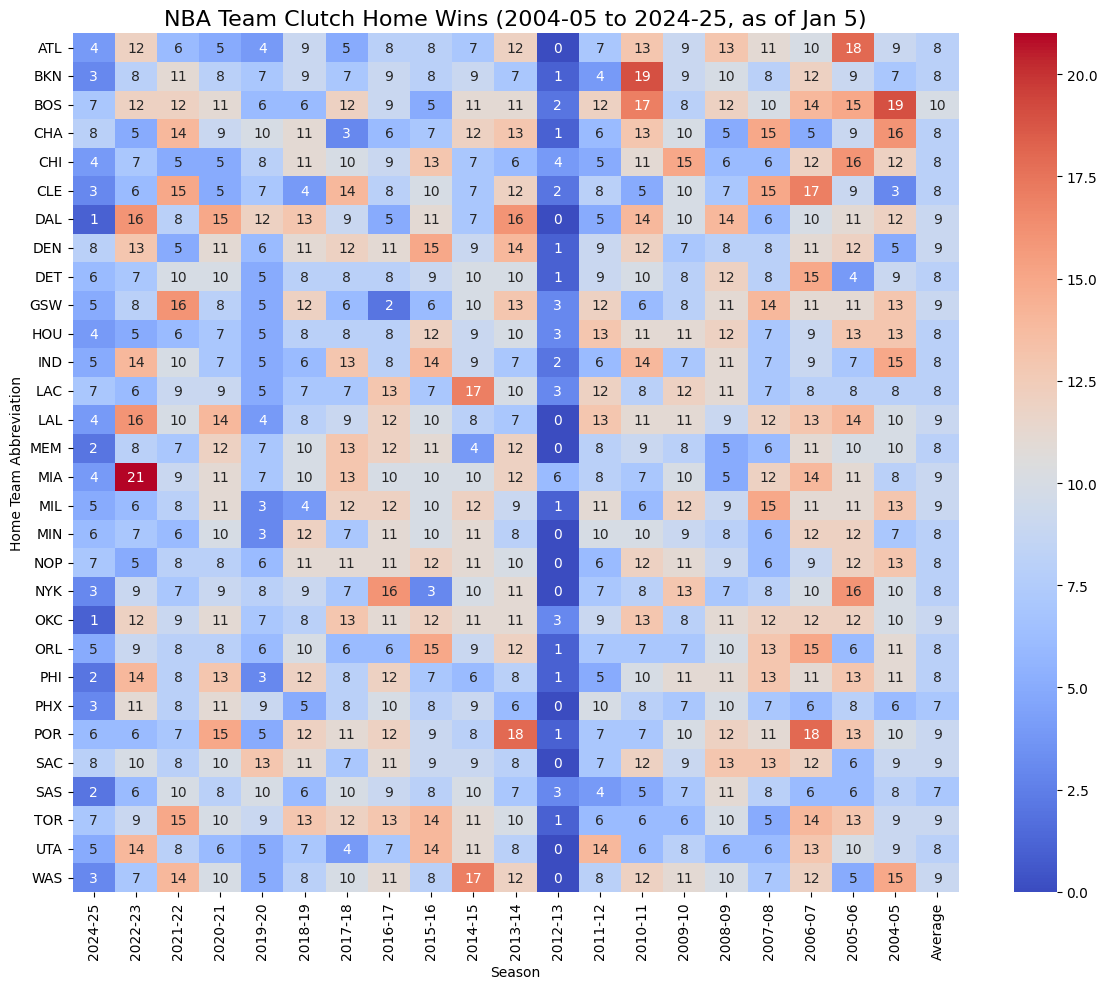

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
# Remove duplicate gameIDs from game_data_filtered
game_data_filtered = game_data_filtered.drop_duplicates(subset='gameId')

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20     971
2020-21    1376
2021-22    1392
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
# Filter for rows where 'season' is 'nan-an'
nan_an_season_games = game_data_filtered[game_data_filtered['season'] == 'nan-an']

# Display the tail of the DataFrame
print(nan_an_season_games.tail())
# it isn't that the 12-13 games are being put into nan-an. I wonder why they are missing.

#  it is simply missing in the dataset! I can't fix this. I can only work with the data I have.

         gameId gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
64447  24600083      NaT      New York       Knicks  1610612752        Boston   
64448  24600078      NaT        Boston      Celtics  1610612738      New York   
64449  24600076      NaT  Philadelphia     Warriors  1610612744      New York   
64450  24600063      NaT      New York       Knicks  1610612752  Philadelphia   
64451  24600052      NaT  Philadelphia     Warriors  1610612744        Boston   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
64447      Celtics  1610612738         62         44                 18   
64448       Knicks  1610612752         65         90                -25   
64449       Knicks  1610612752         62         51                 11   
64450     Warriors  1610612744         64         60                  4   
64451      Celtics  1610612738         66         54                 12   

       season  
64447  nan-an  
64448  nan-an  
64449  nan-an 

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

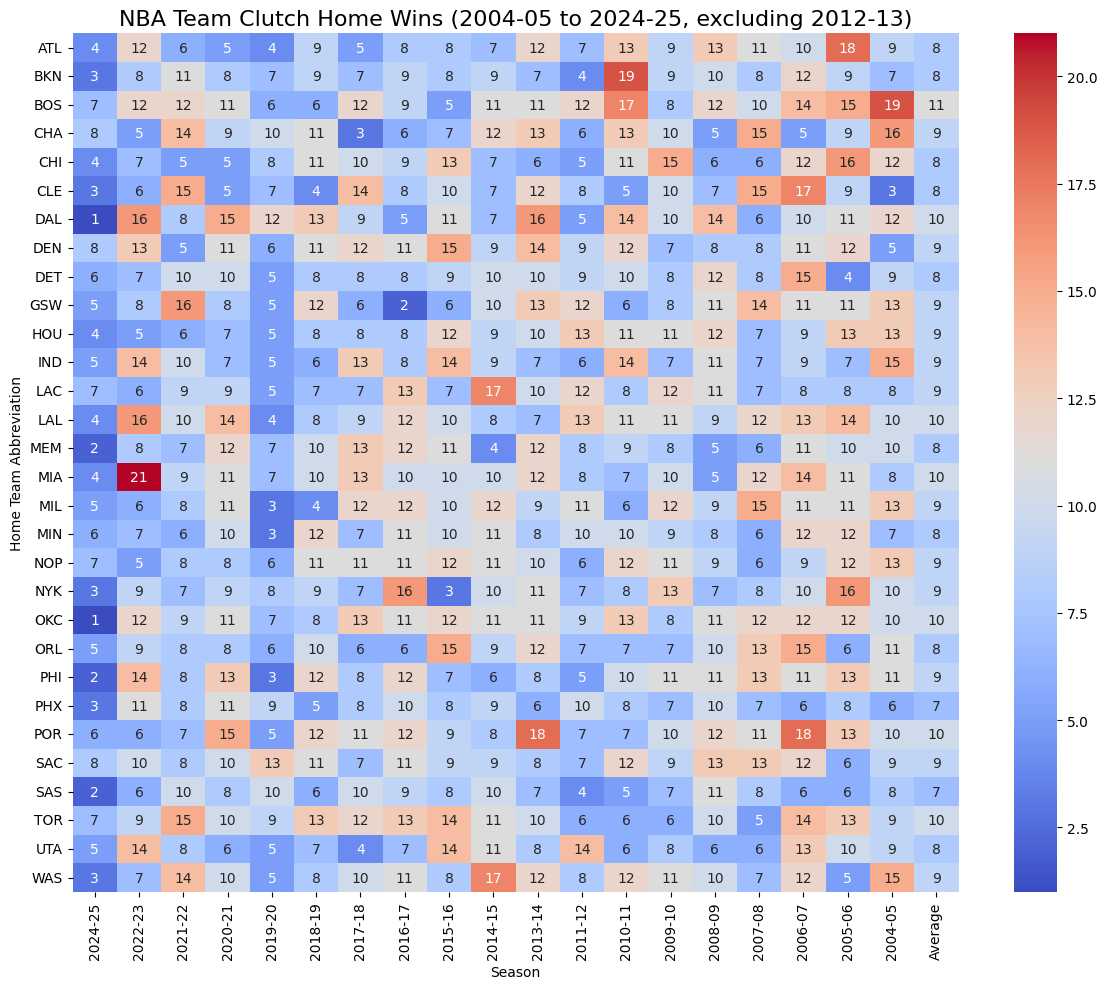

In [ ]:
# Exclude the 2012-13 season
table_excluded = table[table['season'] != '2012-13']

# Create a pivot table for the heatmap excluding the 2012-13 season
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt_excluded = pt_excluded[sorted(pt_excluded.columns, reverse=True)]

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

season          2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
hometeamAbbrev                                                                  
ATL                   9       18       10       11       13        9       13   
BKN                   7        9       12        8       10        9       19   
BOS                  19       15       14       10       12        8       17   
CHA                  16        9        5       15        5       10       13   
CHI                  12       16       12        6        6       15       11   
CLE                   3        9       17       15        7       10        5   
DAL                  12       11       10        6       14       10       14   
DEN                   5       12       11        8        8        7       12   
DET                   9        4       15        8       12        8       10   
GSW                  13       11       11       14       11        8        6   
HOU                  13     

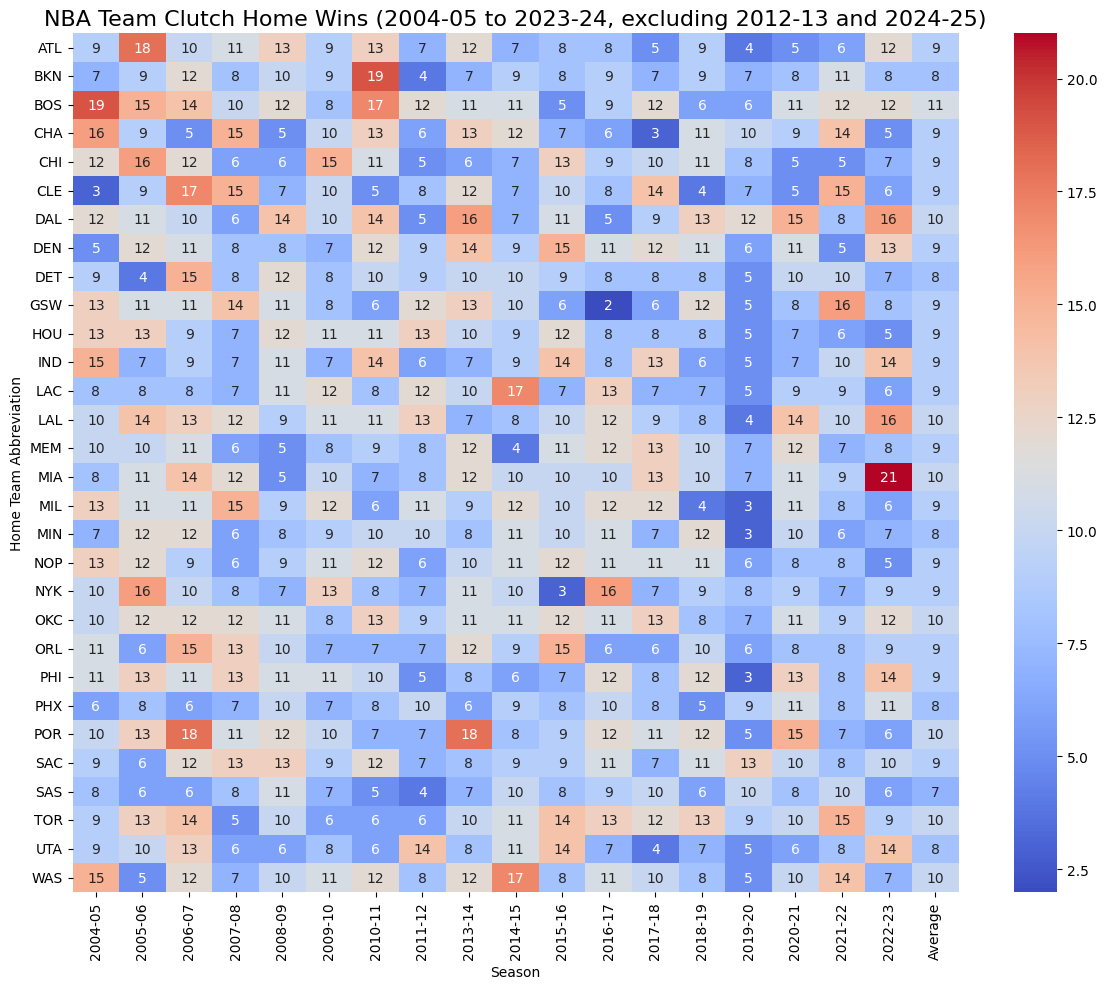

In [ ]:
# Exclude the 2012-13 and 2024-25 seasons
table_excluded = table[(table['season'] != '2012-13') & (table['season'] != '2024-25')]

# Create a pivot table for the heatmap excluding the 2012-13 and 2024-25 seasons
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2023-24, excluding 2012-13 and 2024-25)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

In [ ]:
# Now trying to figure out duplicates in 04-05 NOP data - some show OKC Hor, others NOP.
# Filter for 2004-05 season and NOP home games
nop_2004_05_clutch_home_wins = table[(table['season'] == '2004-05') & (table['hometeamAbbrev'] == 'NOP') & (table['win'] == 1)]

# Display the result
print(nop_2004_05_clutch_home_wins)

         gameId   gameDate   hometeamCity hometeamName  hometeamId  \
24374  20400917 2005-03-13    New Orleans      Hornets  1610612740   
24540  20400760 2005-02-15    New Orleans      Hornets  1610612740   
24564  20400738 2005-02-12    New Orleans      Hornets  1610612740   
24678  20400632 2005-01-29    New Orleans      Hornets  1610612740   
24725  20400588 2005-01-23  Oklahoma City      Hornets  1610612740   
24749  20400565 2005-01-20    New Orleans      Hornets  1610612740   
24838  20400483 2005-01-09    New Orleans      Hornets  1610612740   

       awayteamCity awayteamName  awayteamId  homeScore  awayScore  \
24374     Milwaukee        Bucks  1610612749        111        107   
24540    Washington      Wizards  1610612764         98         96   
24564  Golden State     Warriors  1610612744        111        108   
24678  Philadelphia        76ers  1610612755         99         95   
24725   Los Angeles     Clippers  1610612746         88         85   
24749       Indiana

In [ ]:
mia_2004_05_clutch_home_wins = table[(table['season'] == '2004-05') & (table['hometeamAbbrev'] == 'MIA') & (table['win'] == 1)]

# Display the result
print(mia_2004_05_clutch_home_wins)

         gameId   gameDate hometeamCity hometeamName  hometeamId awayteamCity  \
24078  20401193 2005-04-17        Miami         Heat  1610612748      Indiana   
24485  20400813 2005-02-26        Miami         Heat  1610612748      Orlando   
24557  20400745 2005-02-13        Miami         Heat  1610612748  San Antonio   
25130  20400194 2004-11-28        Miami         Heat  1610612748       Boston   
25202  20400122 2004-11-20        Miami         Heat  1610612748         Utah   
25231  20400093 2004-11-14        Miami         Heat  1610612748    Milwaukee   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
24078       Pacers  1610612754         84         80                  4   
24485        Magic  1610612753        101         98                  3   
24557        Spurs  1610612759         96         92                  4   
25130      Celtics  1610612738        106        104                  2   
25202         Jazz  1610612762        107        105     

In [ ]:
mia_2022_23_clutch_home_wins = table[(table['season'] == '2022-23') & (table['hometeamAbbrev'] == 'MIA') & (table['win'] == 1)]

# Display the result
print(mia_2022_23_clutch_home_wins)

        gameId   gameDate hometeamCity hometeamName  hometeamId  \
604   42200206 2023-05-12        Miami         Heat  1610612748   
878   22201022 2023-03-13        Miami         Heat  1610612748   
900   22201000 2023-03-11        Miami         Heat  1610612748   
926   22200974 2023-03-07        Miami         Heat  1610612748   
1061  22200840 2023-02-11        Miami         Heat  1610612748   
1186  22200714 2023-01-25        Miami         Heat  1610612748   
1200  22200699 2023-01-22        Miami         Heat  1610612748   
1288  22200611 2023-01-11        Miami         Heat  1610612748   
1400  22200500 2022-12-27        Miami         Heat  1610612748   
1623  22200277 2022-11-26        Miami         Heat  1610612748   
1698  22200202 2022-11-15        Miami         Heat  1610612748   
1791  22200109 2022-11-02        Miami         Heat  1610612748   
1869  22200031 2022-10-23        Miami         Heat  1610612748   

       awayteamCity  awayteamName  awayteamId  homeScore  awa

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Filter game_data for unique gameID values
game_data = game_data.drop_duplicates(subset='gameId')

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

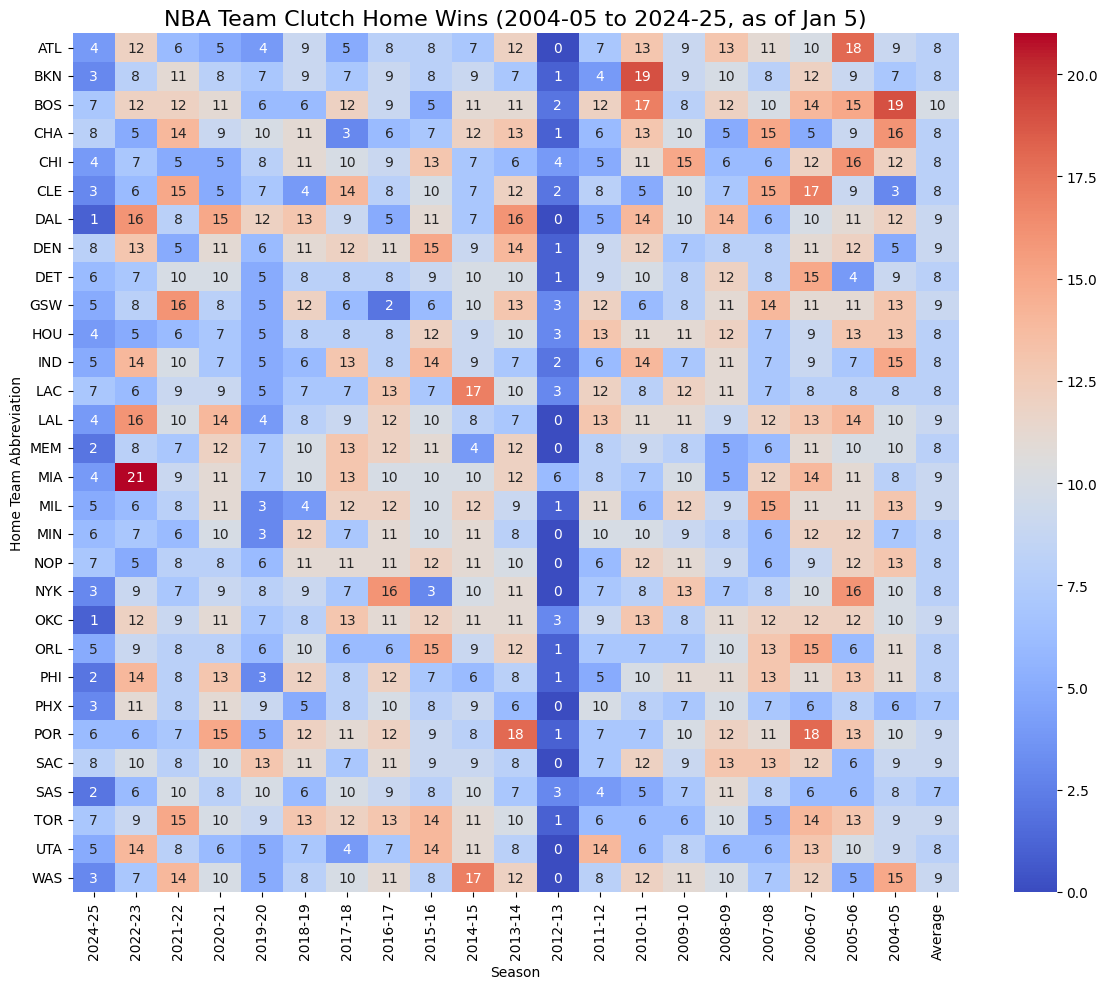

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
# Remove duplicate gameIDs from game_data_filtered
game_data_filtered = game_data_filtered.drop_duplicates(subset='gameId')

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20     971
2020-21    1376
2021-22    1392
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
# Filter for rows where 'season' is 'nan-an'
nan_an_season_games = game_data_filtered[game_data_filtered['season'] == 'nan-an']

# Display the tail of the DataFrame
print(nan_an_season_games.tail())
# it isn't that the 12-13 games are being put into nan-an. I wonder why they are missing.

#  it is simply missing in the dataset! I can't fix this. I can only work with the data I have.

         gameId gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
64447  24600083      NaT      New York       Knicks  1610612752        Boston   
64448  24600078      NaT        Boston      Celtics  1610612738      New York   
64449  24600076      NaT  Philadelphia     Warriors  1610612744      New York   
64450  24600063      NaT      New York       Knicks  1610612752  Philadelphia   
64451  24600052      NaT  Philadelphia     Warriors  1610612744        Boston   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
64447      Celtics  1610612738         62         44                 18   
64448       Knicks  1610612752         65         90                -25   
64449       Knicks  1610612752         62         51                 11   
64450     Warriors  1610612744         64         60                  4   
64451      Celtics  1610612738         66         54                 12   

       season  
64447  nan-an  
64448  nan-an  
64449  nan-an 

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

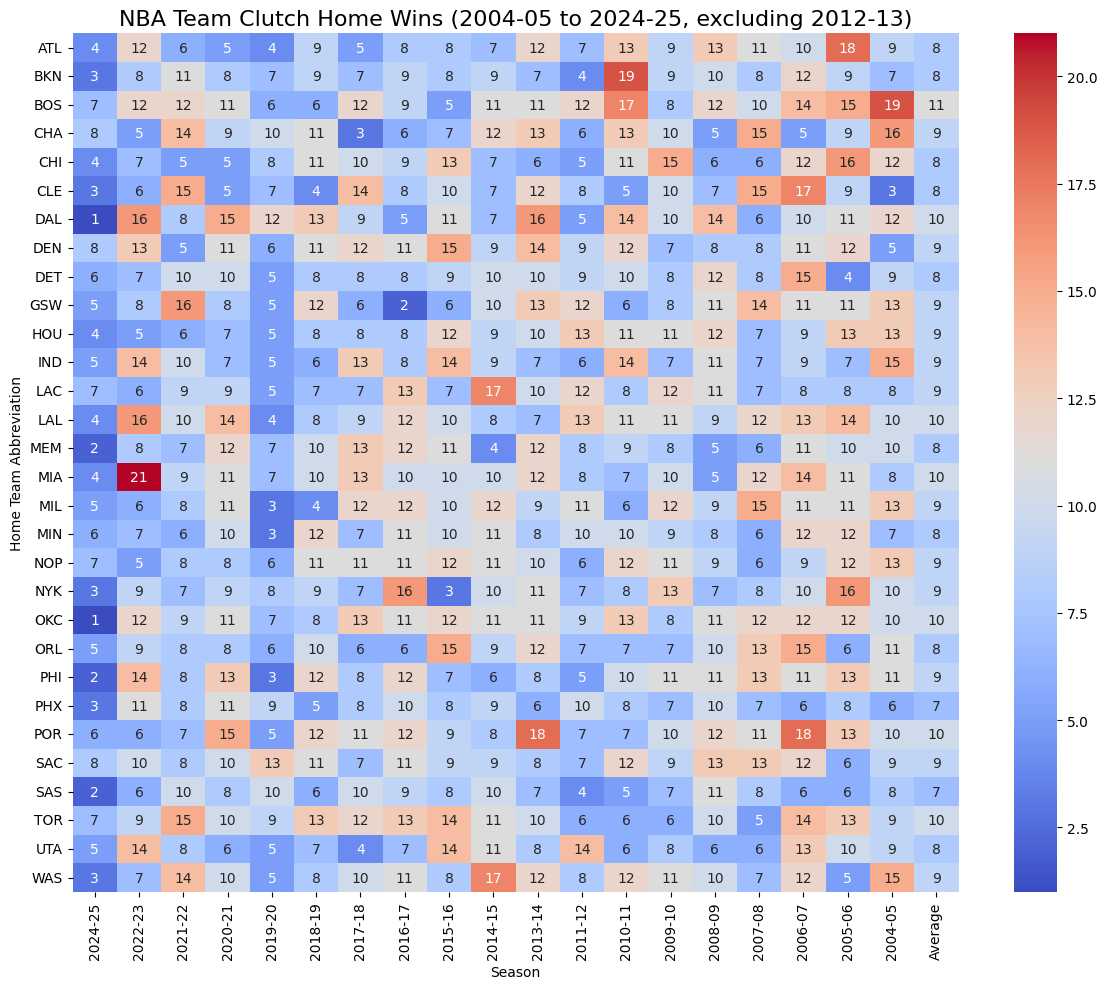

In [ ]:
# Exclude the 2012-13 season
table_excluded = table[table['season'] != '2012-13']

# Create a pivot table for the heatmap excluding the 2012-13 season
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt_excluded = pt_excluded[sorted(pt_excluded.columns, reverse=True)]

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

season          2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
hometeamAbbrev                                                                  
ATL                   9       18       10       11       13        9       13   
BKN                   7        9       12        8       10        9       19   
BOS                  19       15       14       10       12        8       17   
CHA                  16        9        5       15        5       10       13   
CHI                  12       16       12        6        6       15       11   
CLE                   3        9       17       15        7       10        5   
DAL                  12       11       10        6       14       10       14   
DEN                   5       12       11        8        8        7       12   
DET                   9        4       15        8       12        8       10   
GSW                  13       11       11       14       11        8        6   
HOU                  13     

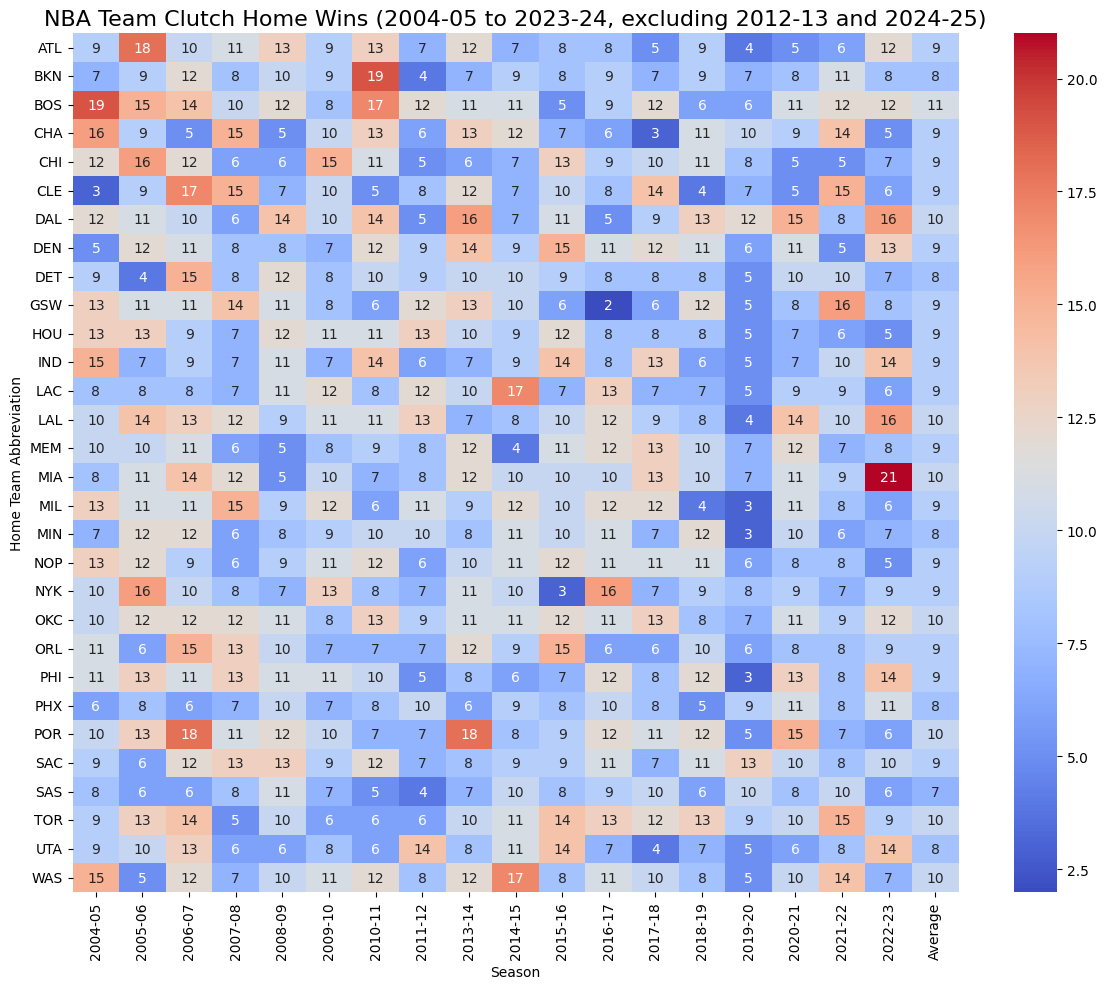

In [ ]:
# Exclude the 2012-13 and 2024-25 seasons
table_excluded = table[(table['season'] != '2012-13') & (table['season'] != '2024-25')]

# Create a pivot table for the heatmap excluding the 2012-13 and 2024-25 seasons
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2023-24, excluding 2012-13 and 2024-25)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

In [ ]:
mia_2022_23_clutch_home_wins = table[(table['season'] == '2022-23') & (table['hometeamAbbrev'] == 'MIA') & (table['win'] == 1)]

# Display the result
print(mia_2022_23_clutch_home_wins)

        gameId   gameDate hometeamCity hometeamName  hometeamId  \
604   42200206 2023-05-12        Miami         Heat  1610612748   
878   22201022 2023-03-13        Miami         Heat  1610612748   
900   22201000 2023-03-11        Miami         Heat  1610612748   
926   22200974 2023-03-07        Miami         Heat  1610612748   
1061  22200840 2023-02-11        Miami         Heat  1610612748   
1186  22200714 2023-01-25        Miami         Heat  1610612748   
1200  22200699 2023-01-22        Miami         Heat  1610612748   
1288  22200611 2023-01-11        Miami         Heat  1610612748   
1400  22200500 2022-12-27        Miami         Heat  1610612748   
1623  22200277 2022-11-26        Miami         Heat  1610612748   
1698  22200202 2022-11-15        Miami         Heat  1610612748   
1791  22200109 2022-11-02        Miami         Heat  1610612748   
1869  22200031 2022-10-23        Miami         Heat  1610612748   

       awayteamCity  awayteamName  awayteamId  homeScore  awa

In [ ]:
mia_2022_23_clutch_home_wins = table[(table['season'] == '2022-23') & (table['hometeamAbbrev'] == 'MIA') & (table['win'] == 1)]

# Display the result
print(mia_2022_23_clutch_home_wins)

# Calculate the length of the new table
length_of_table = len(mia_2022_23_clutch_home_wins)
print(f"Length of the new table: {length_of_table}")

        gameId   gameDate hometeamCity hometeamName  hometeamId  \
604   42200206 2023-05-12        Miami         Heat  1610612748   
878   22201022 2023-03-13        Miami         Heat  1610612748   
900   22201000 2023-03-11        Miami         Heat  1610612748   
926   22200974 2023-03-07        Miami         Heat  1610612748   
1061  22200840 2023-02-11        Miami         Heat  1610612748   
1186  22200714 2023-01-25        Miami         Heat  1610612748   
1200  22200699 2023-01-22        Miami         Heat  1610612748   
1288  22200611 2023-01-11        Miami         Heat  1610612748   
1400  22200500 2022-12-27        Miami         Heat  1610612748   
1623  22200277 2022-11-26        Miami         Heat  1610612748   
1698  22200202 2022-11-15        Miami         Heat  1610612748   
1791  22200109 2022-11-02        Miami         Heat  1610612748   
1869  22200031 2022-10-23        Miami         Heat  1610612748   

       awayteamCity  awayteamName  awayteamId  homeScore  awa

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Filter game_data for unique gameID values
game_data = game_data.drop_duplicates(subset='gameId')

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

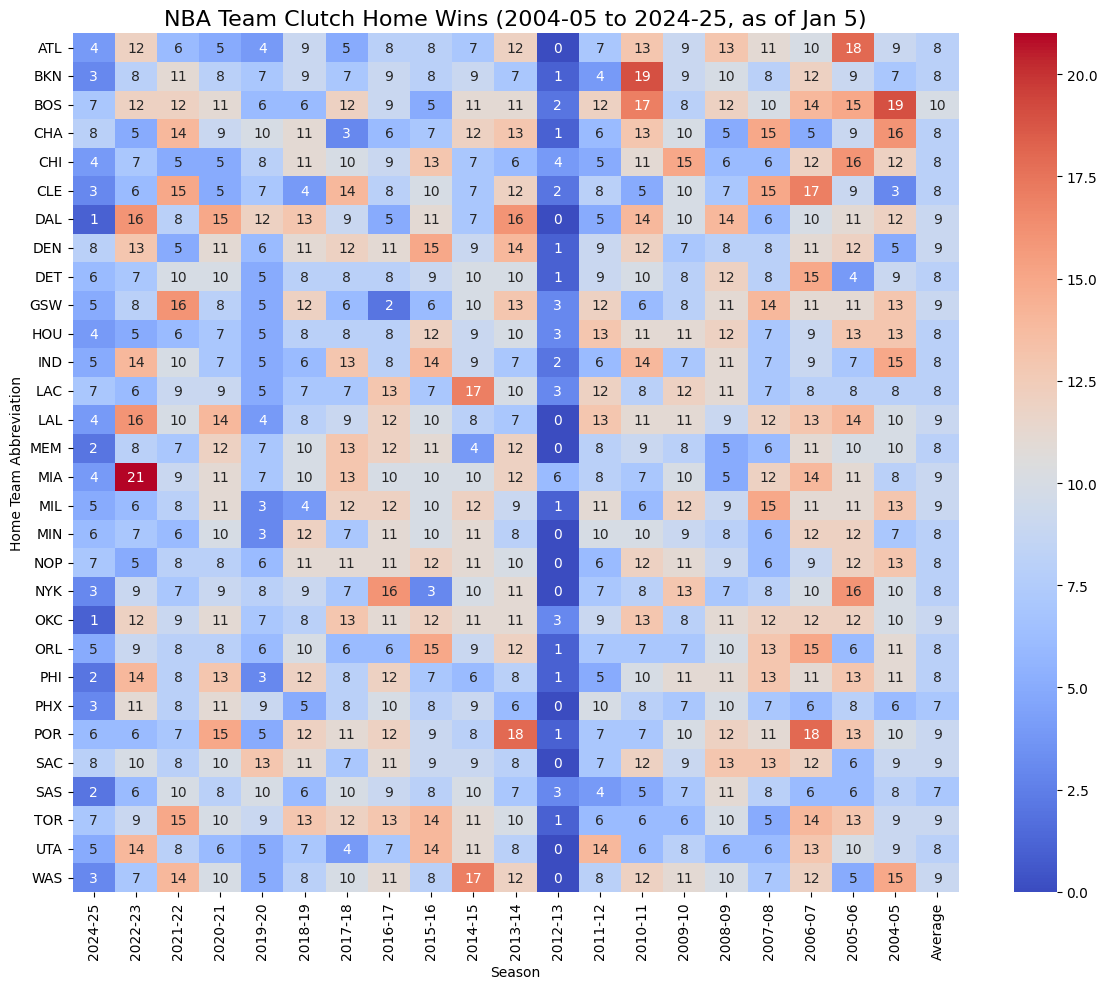

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
# Remove duplicate gameIDs from game_data_filtered
game_data_filtered = game_data_filtered.drop_duplicates(subset='gameId')

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20     971
2020-21    1376
2021-22    1392
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
# Filter for rows where 'season' is 'nan-an'
nan_an_season_games = game_data_filtered[game_data_filtered['season'] == 'nan-an']

# Display the tail of the DataFrame
print(nan_an_season_games.tail())
# it isn't that the 12-13 games are being put into nan-an. I wonder why they are missing.

#  it is simply missing in the dataset! I can't fix this. I can only work with the data I have.

         gameId gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
64447  24600083      NaT      New York       Knicks  1610612752        Boston   
64448  24600078      NaT        Boston      Celtics  1610612738      New York   
64449  24600076      NaT  Philadelphia     Warriors  1610612744      New York   
64450  24600063      NaT      New York       Knicks  1610612752  Philadelphia   
64451  24600052      NaT  Philadelphia     Warriors  1610612744        Boston   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
64447      Celtics  1610612738         62         44                 18   
64448       Knicks  1610612752         65         90                -25   
64449       Knicks  1610612752         62         51                 11   
64450     Warriors  1610612744         64         60                  4   
64451      Celtics  1610612738         66         54                 12   

       season  
64447  nan-an  
64448  nan-an  
64449  nan-an 

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

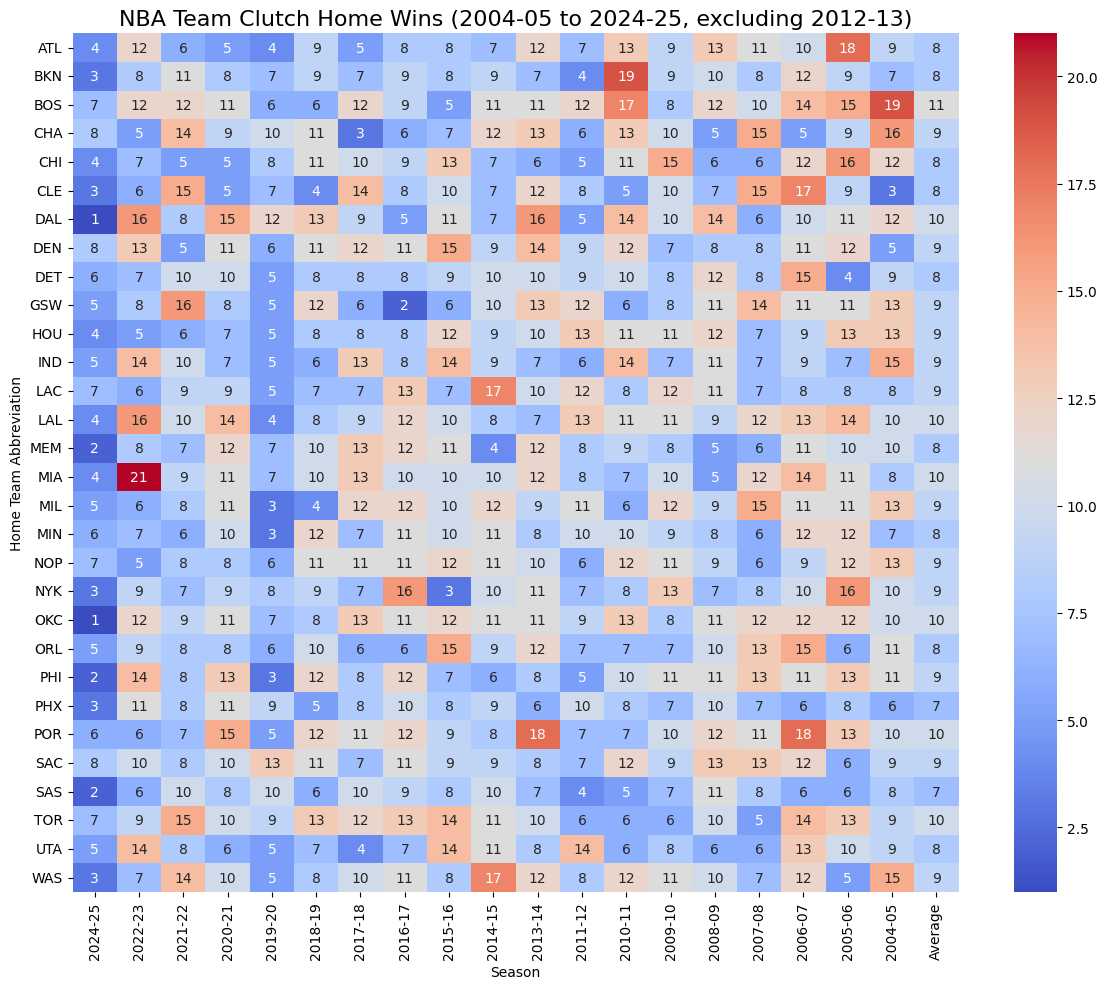

In [ ]:
# Exclude the 2012-13 season
table_excluded = table[table['season'] != '2012-13']

# Create a pivot table for the heatmap excluding the 2012-13 season
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt_excluded = pt_excluded[sorted(pt_excluded.columns, reverse=True)]

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

season          2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
hometeamAbbrev                                                                  
ATL                   9       18       10       11       13        9       13   
BKN                   7        9       12        8       10        9       19   
BOS                  19       15       14       10       12        8       17   
CHA                  16        9        5       15        5       10       13   
CHI                  12       16       12        6        6       15       11   
CLE                   3        9       17       15        7       10        5   
DAL                  12       11       10        6       14       10       14   
DEN                   5       12       11        8        8        7       12   
DET                   9        4       15        8       12        8       10   
GSW                  13       11       11       14       11        8        6   
HOU                  13     

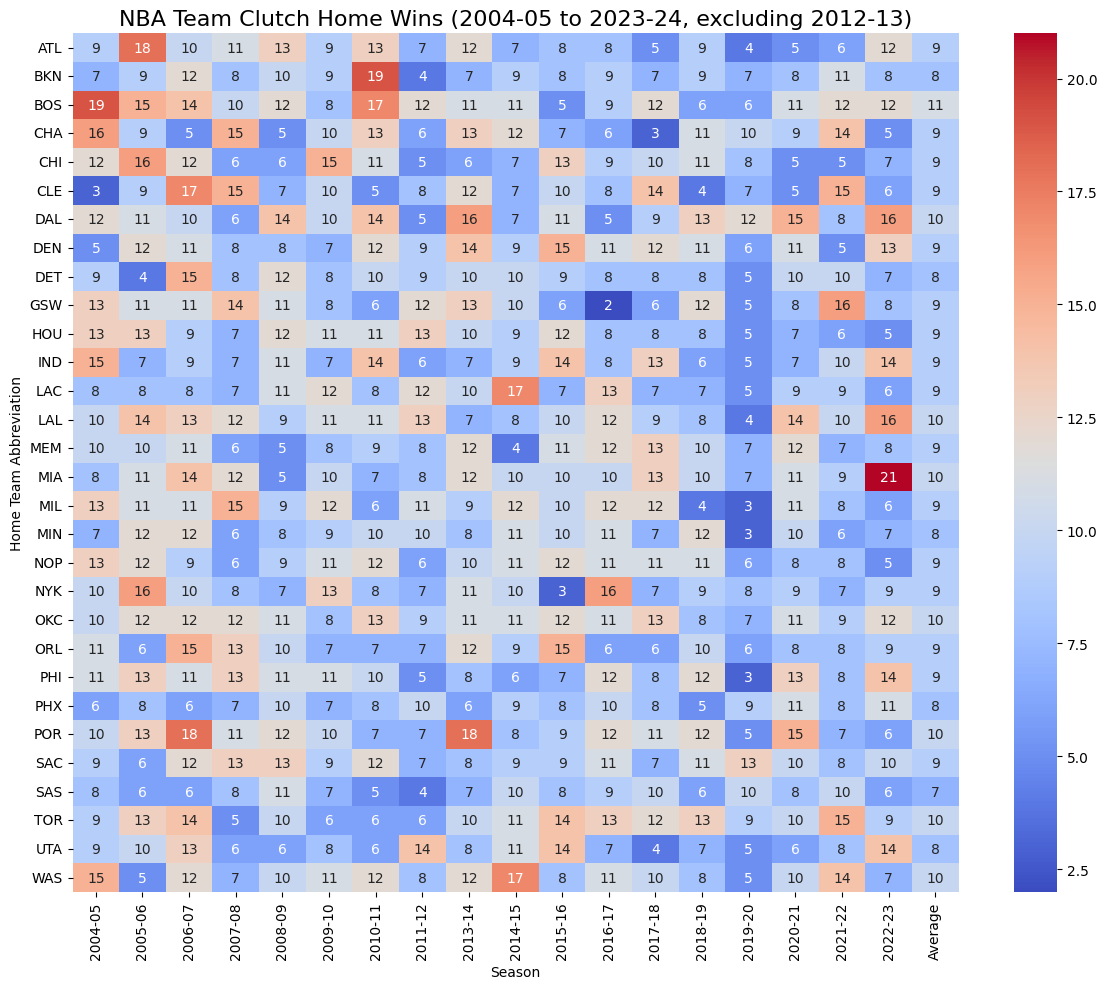

In [ ]:
# Exclude the 2012-13 and 2024-25 seasons
table_excluded = table[(table['season'] != '2012-13') & (table['season'] != '2024-25')]

# Create a pivot table for the heatmap excluding the 2012-13 and 2024-25 seasons
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2023-24, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Filter game_data for unique gameID values
game_data = game_data.drop_duplicates(subset='gameId')

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 6:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

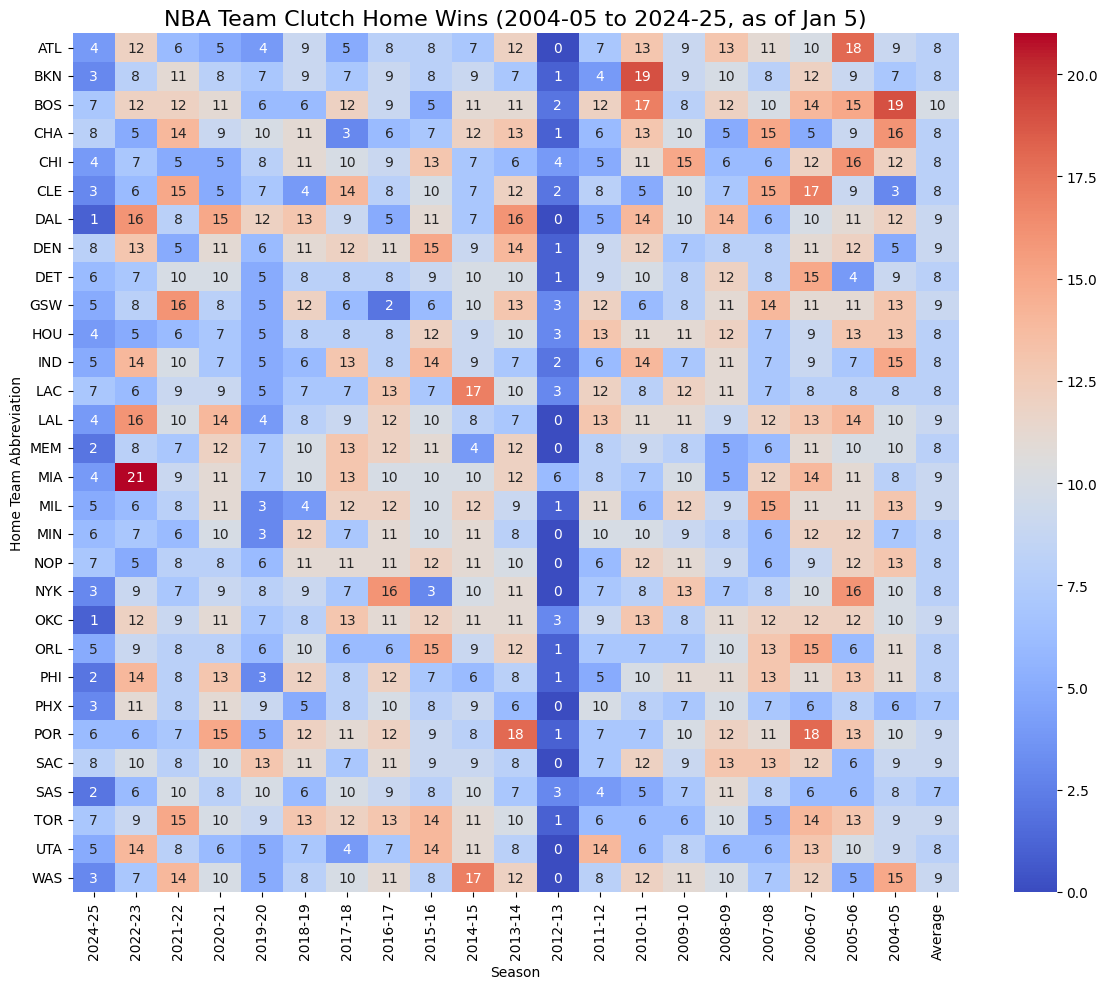

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
# Remove duplicate gameIDs from game_data_filtered
game_data_filtered = game_data_filtered.drop_duplicates(subset='gameId')

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20     971
2020-21    1376
2021-22    1392
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
# Filter for rows where 'season' is 'nan-an'
nan_an_season_games = game_data_filtered[game_data_filtered['season'] == 'nan-an']

# Display the tail of the DataFrame
print(nan_an_season_games.tail())
# it isn't that the 12-13 games are being put into nan-an. I wonder why they are missing.

#  it is simply missing in the dataset! I can't fix this. I can only work with the data I have.

         gameId gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
64447  24600083      NaT      New York       Knicks  1610612752        Boston   
64448  24600078      NaT        Boston      Celtics  1610612738      New York   
64449  24600076      NaT  Philadelphia     Warriors  1610612744      New York   
64450  24600063      NaT      New York       Knicks  1610612752  Philadelphia   
64451  24600052      NaT  Philadelphia     Warriors  1610612744        Boston   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
64447      Celtics  1610612738         62         44                 18   
64448       Knicks  1610612752         65         90                -25   
64449       Knicks  1610612752         62         51                 11   
64450     Warriors  1610612744         64         60                  4   
64451      Celtics  1610612738         66         54                 12   

       season  
64447  nan-an  
64448  nan-an  
64449  nan-an 

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

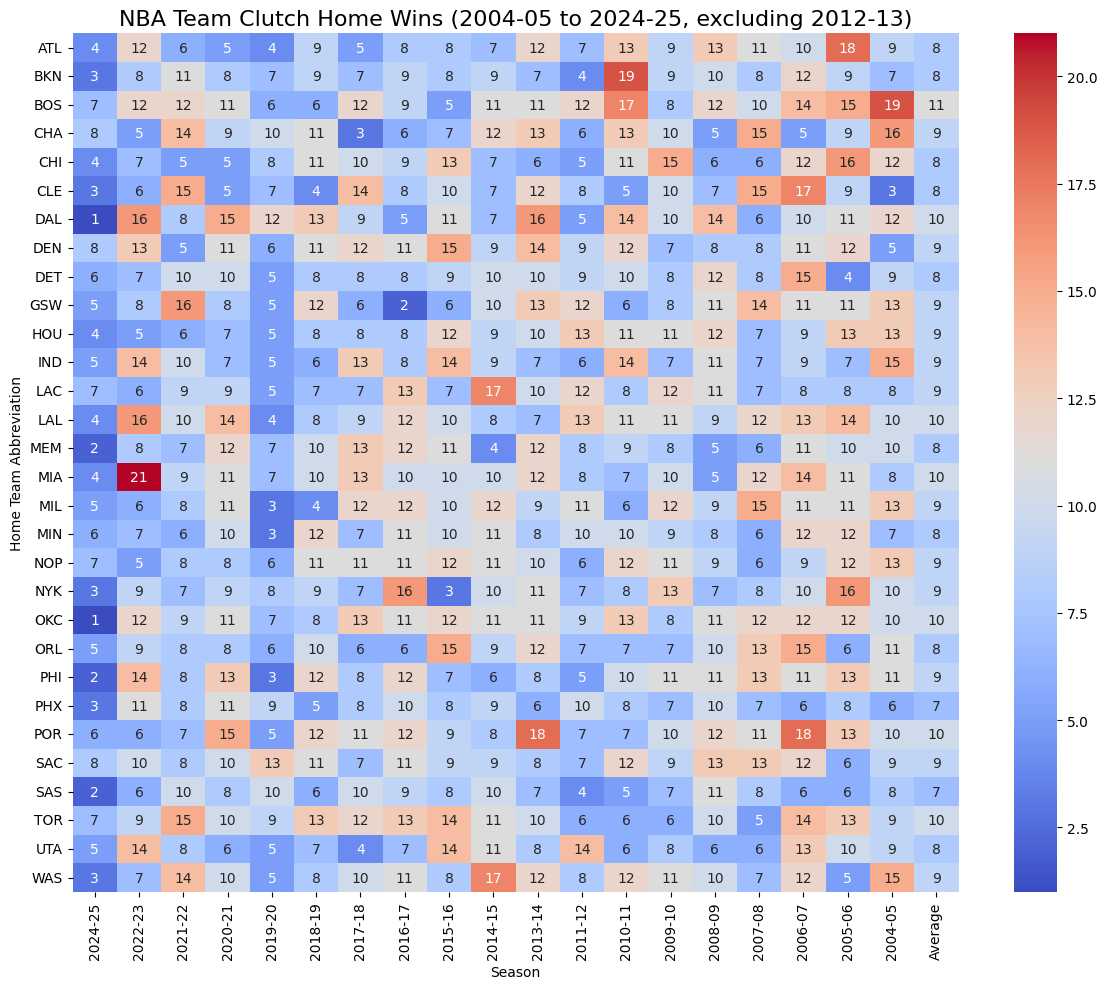

In [ ]:
# Exclude the 2012-13 season
table_excluded = table[table['season'] != '2012-13']

# Create a pivot table for the heatmap excluding the 2012-13 season
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt_excluded = pt_excluded[sorted(pt_excluded.columns, reverse=True)]

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

season          2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
hometeamAbbrev                                                                  
ATL                   9       18       10       11       13        9       13   
BKN                   7        9       12        8       10        9       19   
BOS                  19       15       14       10       12        8       17   
CHA                  16        9        5       15        5       10       13   
CHI                  12       16       12        6        6       15       11   
CLE                   3        9       17       15        7       10        5   
DAL                  12       11       10        6       14       10       14   
DEN                   5       12       11        8        8        7       12   
DET                   9        4       15        8       12        8       10   
GSW                  13       11       11       14       11        8        6   
HOU                  13     

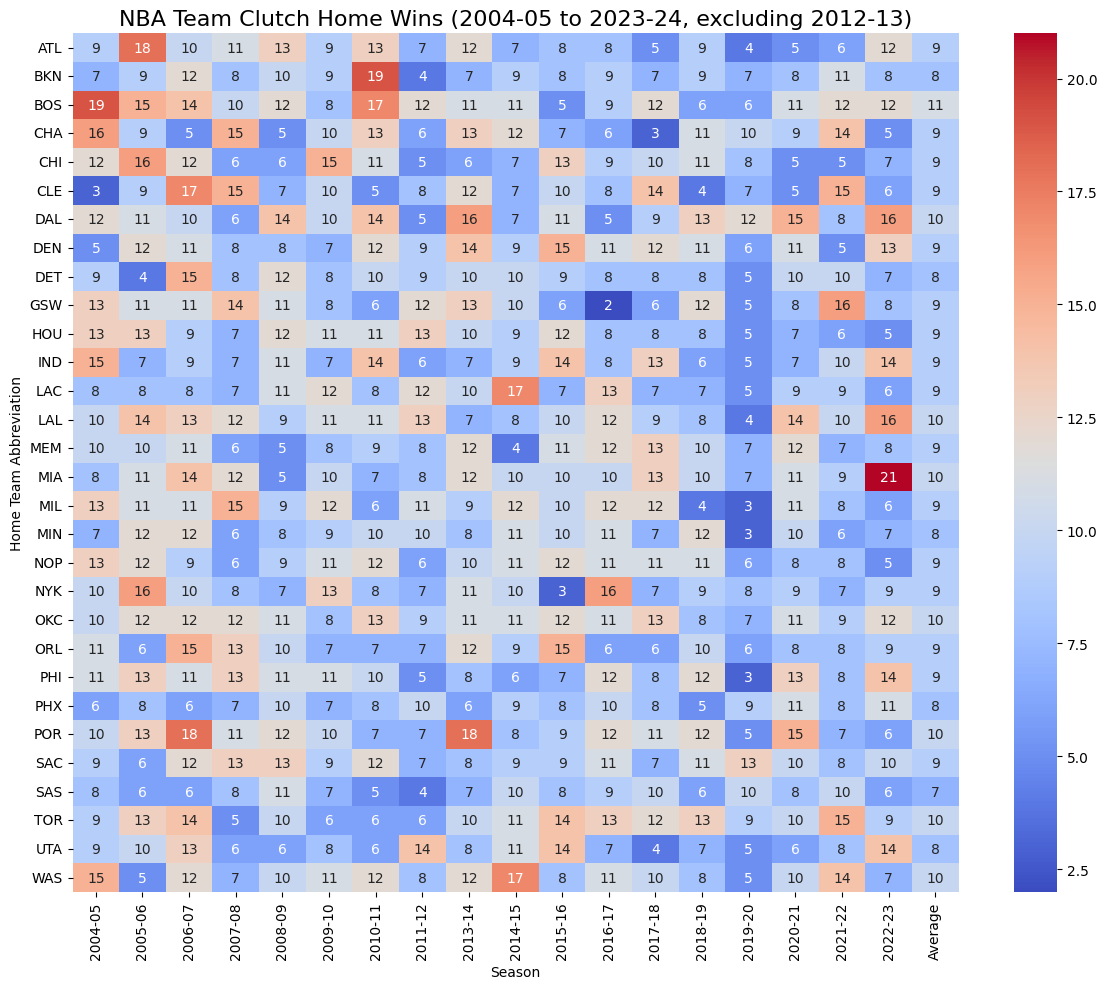

In [ ]:
# Exclude the 2012-13 and 2024-25 seasons
table_excluded = table[(table['season'] != '2012-13') & (table['season'] != '2024-25')]

# Create a pivot table for the heatmap excluding the 2012-13 and 2024-25 seasons
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2023-24, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        8        7        9        7   
BOS                   7       12       12       11        6        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       15       12       13        9   
DEN                   8       13        5       11        6       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

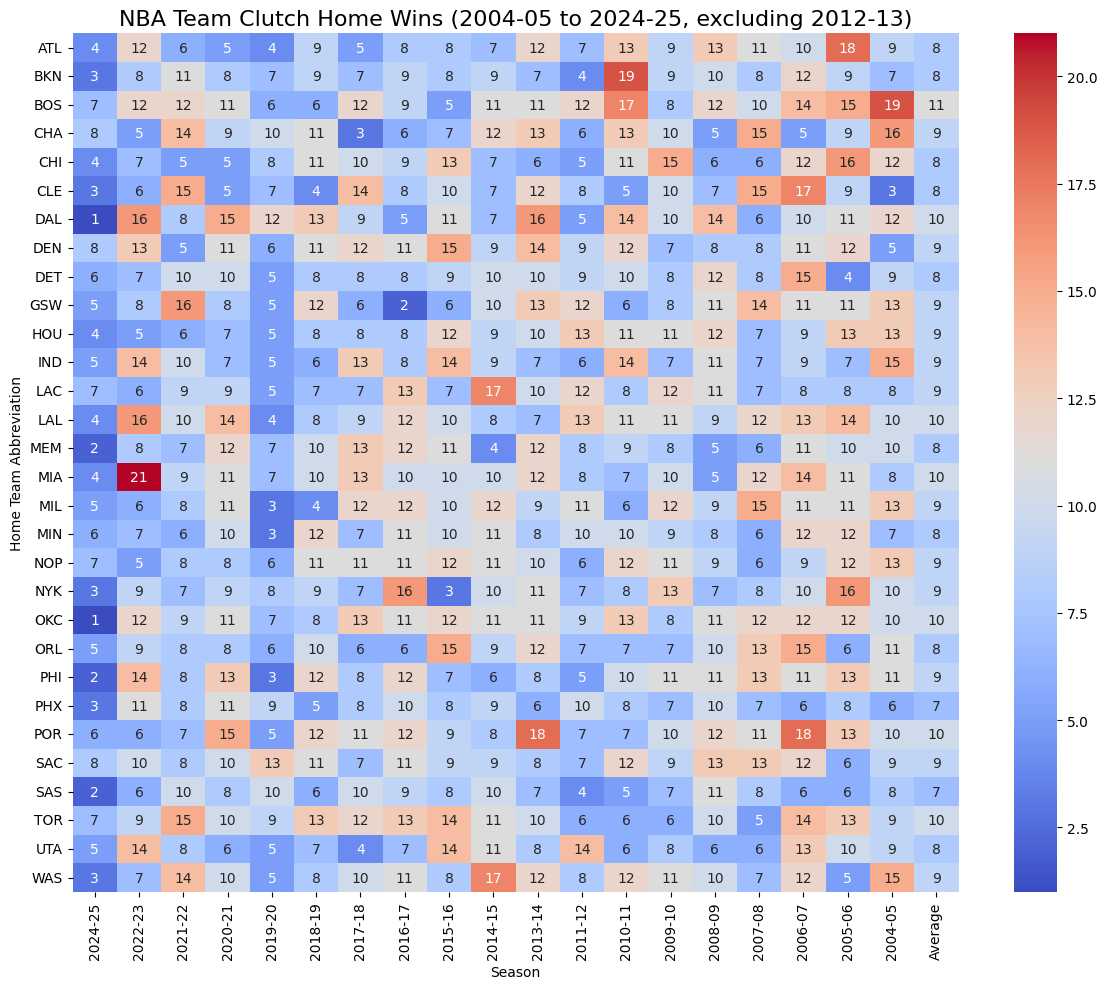

In [ ]:
# Exclude the 2012-13 season
table_excluded = table[table['season'] != '2012-13']

# Create a pivot table for the heatmap excluding the 2012-13 season
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt_excluded = pt_excluded[sorted(pt_excluded.columns, reverse=True)]

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Filter game_data for unique gameID values
game_data = game_data.drop_duplicates(subset='gameId')

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 8:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        7        8        9        7   
BOS                   7       12       12        9        8        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       11       16       13        9   
DEN                   8       13        5       10        7       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        7        8        9        7   
BOS                   7       12       12        9        8        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       11       16       13        9   
DEN                   8       13        5       10        7       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

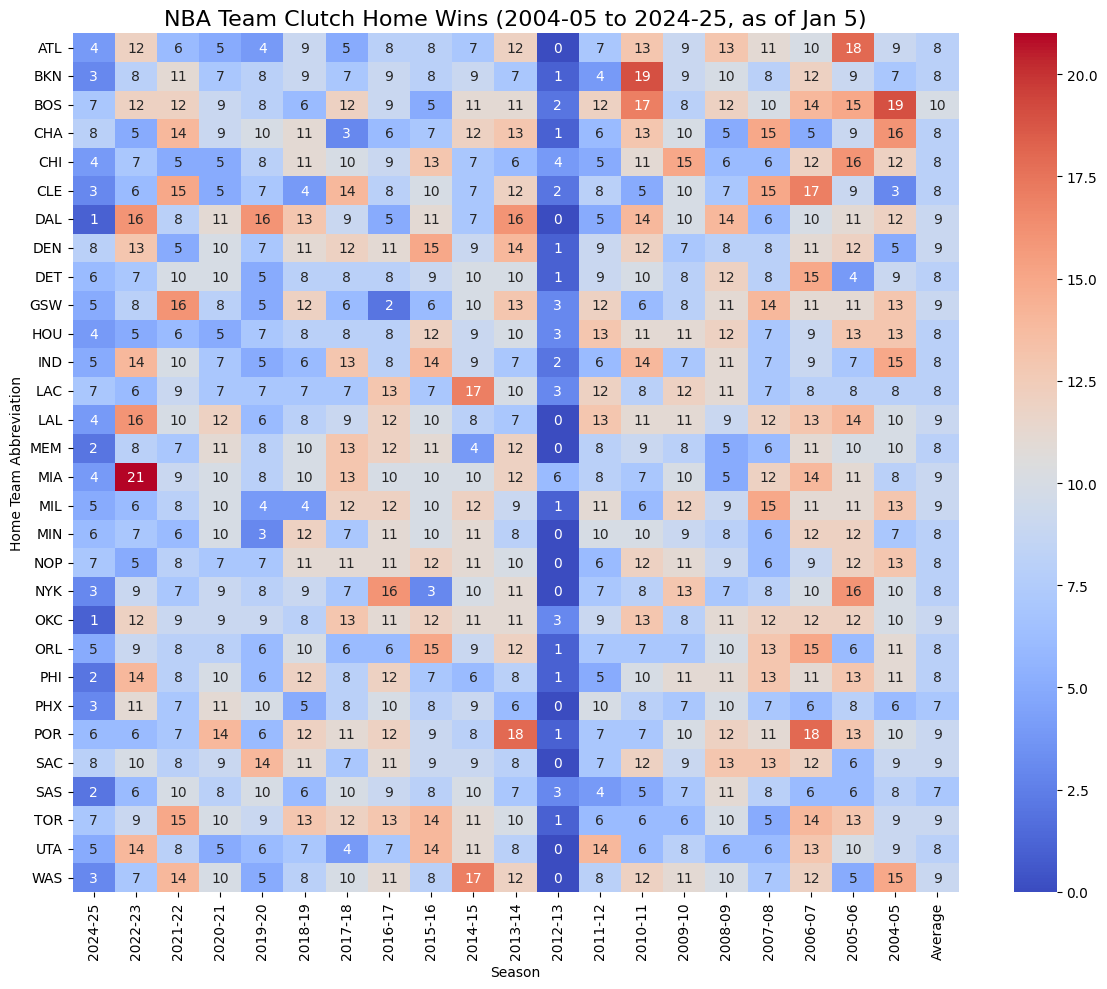

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
# Remove duplicate gameIDs from game_data_filtered
game_data_filtered = game_data_filtered.drop_duplicates(subset='gameId')

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20    1100
2020-21    1256
2021-22    1383
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
# Filter for rows where 'season' is 'nan-an'
nan_an_season_games = game_data_filtered[game_data_filtered['season'] == 'nan-an']

# Display the tail of the DataFrame
print(nan_an_season_games.tail())
# it isn't that the 12-13 games are being put into nan-an. I wonder why they are missing.

#  it is simply missing in the dataset! I can't fix this. I can only work with the data I have.

         gameId gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
64447  24600083      NaT      New York       Knicks  1610612752        Boston   
64448  24600078      NaT        Boston      Celtics  1610612738      New York   
64449  24600076      NaT  Philadelphia     Warriors  1610612744      New York   
64450  24600063      NaT      New York       Knicks  1610612752  Philadelphia   
64451  24600052      NaT  Philadelphia     Warriors  1610612744        Boston   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
64447      Celtics  1610612738         62         44                 18   
64448       Knicks  1610612752         65         90                -25   
64449       Knicks  1610612752         62         51                 11   
64450     Warriors  1610612744         64         60                  4   
64451      Celtics  1610612738         66         54                 12   

       season  
64447  nan-an  
64448  nan-an  
64449  nan-an 

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        7        8        9        7   
BOS                   7       12       12        9        8        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       11       16       13        9   
DEN                   8       13        5       10        7       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

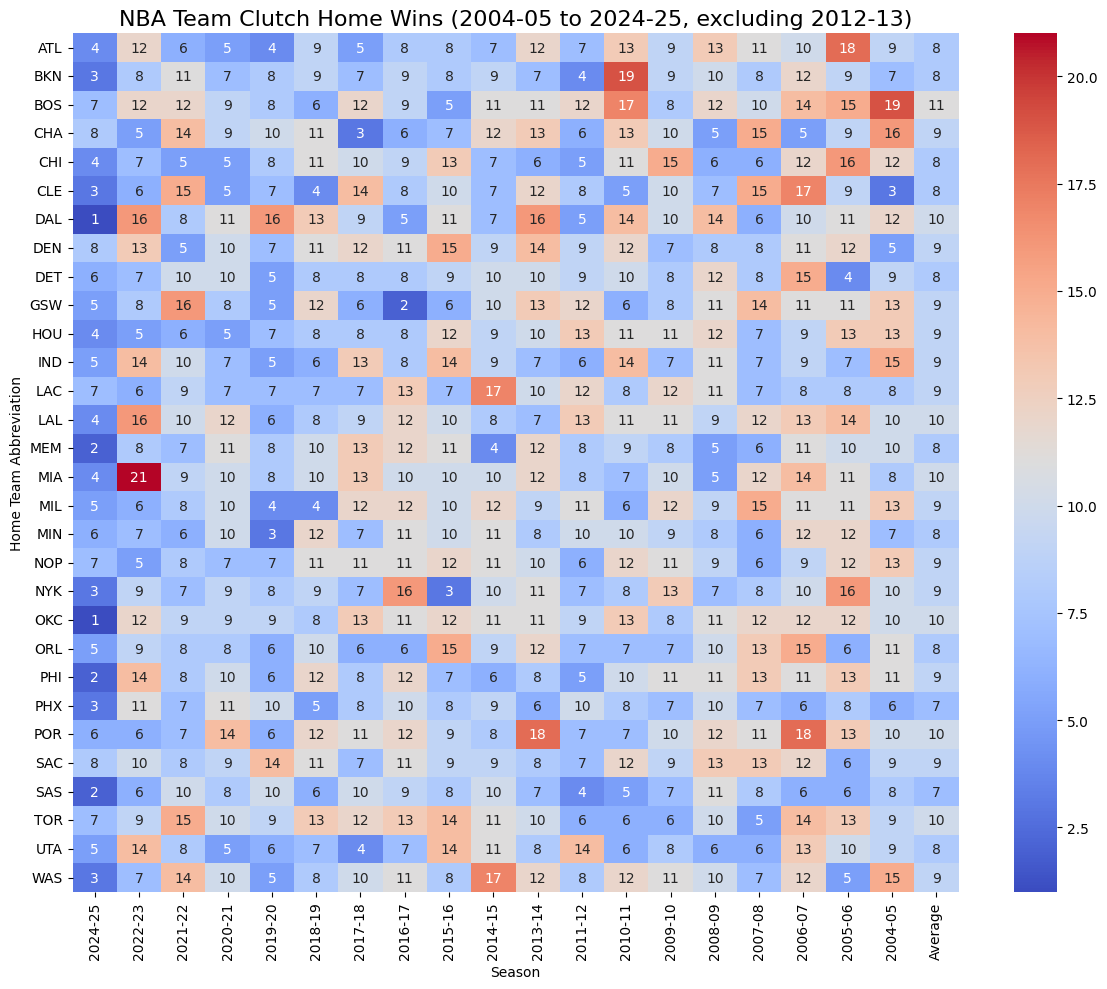

In [ ]:
# Exclude the 2012-13 season
table_excluded = table[table['season'] != '2012-13']

# Create a pivot table for the heatmap excluding the 2012-13 season
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt_excluded = pt_excluded[sorted(pt_excluded.columns, reverse=True)]

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

season          2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
hometeamAbbrev                                                                  
ATL                   9       18       10       11       13        9       13   
BKN                   7        9       12        8       10        9       19   
BOS                  19       15       14       10       12        8       17   
CHA                  16        9        5       15        5       10       13   
CHI                  12       16       12        6        6       15       11   
CLE                   3        9       17       15        7       10        5   
DAL                  12       11       10        6       14       10       14   
DEN                   5       12       11        8        8        7       12   
DET                   9        4       15        8       12        8       10   
GSW                  13       11       11       14       11        8        6   
HOU                  13     

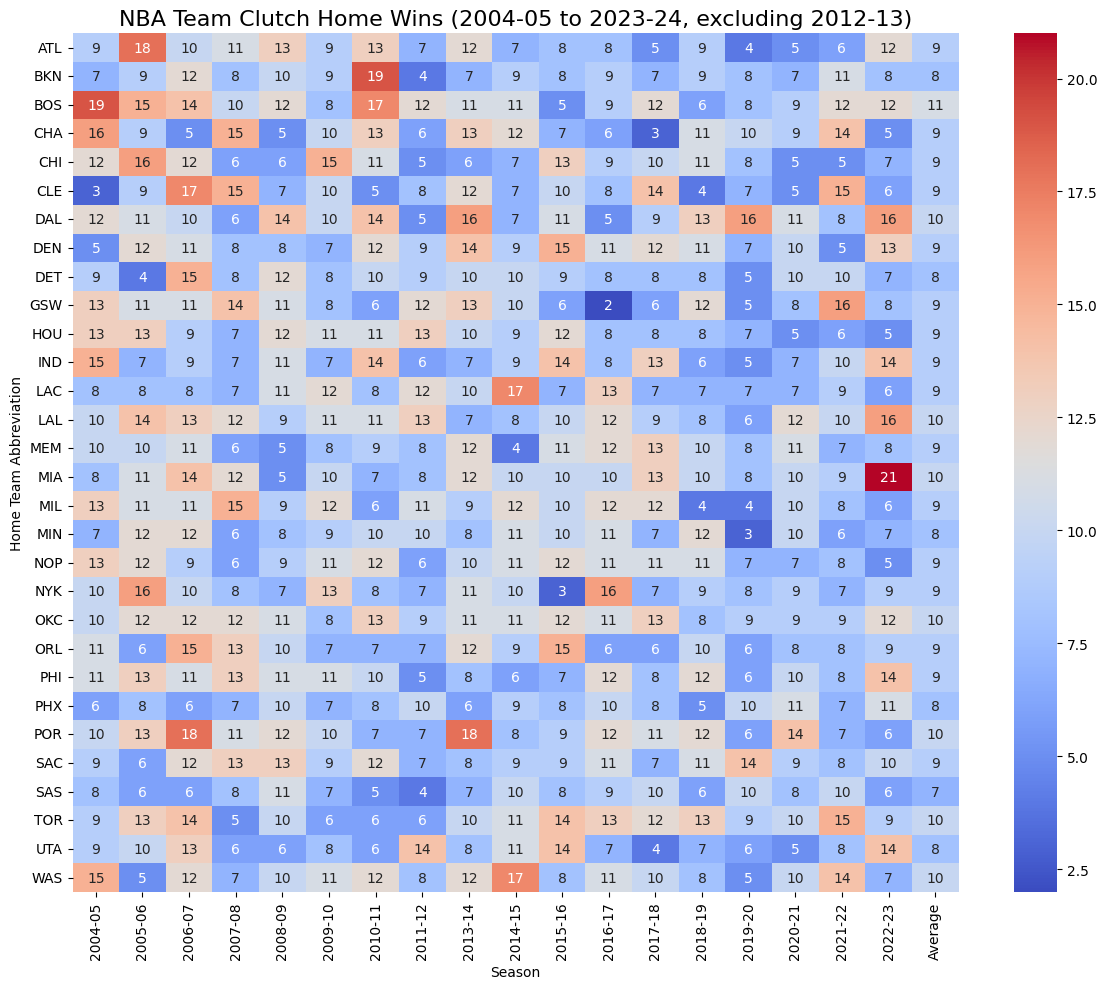

In [ ]:
# Exclude the 2012-13 and 2024-25 seasons
table_excluded = table[(table['season'] != '2012-13') & (table['season'] != '2024-25')]

# Create a pivot table for the heatmap excluding the 2012-13 and 2024-25 seasons
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2023-24, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

In [ ]:
# Now trying to figure out duplicates in 04-05 NOP data - some show OKC Hor, others NOP.
# Filter for 2004-05 season and NOP home games
nop_2004_05_clutch_home_wins = table[(table['season'] == '2004-05') & (table['hometeamAbbrev'] == 'NOP') & (table['win'] == 1)]

# Display the result
print(nop_2004_05_clutch_home_wins)

         gameId   gameDate   hometeamCity hometeamName  hometeamId  \
24374  20400917 2005-03-13    New Orleans      Hornets  1610612740   
24540  20400760 2005-02-15    New Orleans      Hornets  1610612740   
24564  20400738 2005-02-12    New Orleans      Hornets  1610612740   
24678  20400632 2005-01-29    New Orleans      Hornets  1610612740   
24725  20400588 2005-01-23  Oklahoma City      Hornets  1610612740   
24749  20400565 2005-01-20    New Orleans      Hornets  1610612740   
24838  20400483 2005-01-09    New Orleans      Hornets  1610612740   

       awayteamCity awayteamName  awayteamId  homeScore  awayScore  \
24374     Milwaukee        Bucks  1610612749        111        107   
24540    Washington      Wizards  1610612764         98         96   
24564  Golden State     Warriors  1610612744        111        108   
24678  Philadelphia        76ers  1610612755         99         95   
24725   Los Angeles     Clippers  1610612746         88         85   
24749       Indiana

In [ ]:
mia_2022_23_clutch_home_wins = table[(table['season'] == '2022-23') & (table['hometeamAbbrev'] == 'MIA') & (table['win'] == 1)]

# Display the result
print(mia_2022_23_clutch_home_wins)

# Calculate the length of the new table
length_of_table = len(mia_2022_23_clutch_home_wins)
print(f"Length of the new table: {length_of_table}")

        gameId   gameDate hometeamCity hometeamName  hometeamId  \
604   42200206 2023-05-12        Miami         Heat  1610612748   
878   22201022 2023-03-13        Miami         Heat  1610612748   
900   22201000 2023-03-11        Miami         Heat  1610612748   
926   22200974 2023-03-07        Miami         Heat  1610612748   
1061  22200840 2023-02-11        Miami         Heat  1610612748   
1186  22200714 2023-01-25        Miami         Heat  1610612748   
1200  22200699 2023-01-22        Miami         Heat  1610612748   
1288  22200611 2023-01-11        Miami         Heat  1610612748   
1400  22200500 2022-12-27        Miami         Heat  1610612748   
1623  22200277 2022-11-26        Miami         Heat  1610612748   
1698  22200202 2022-11-15        Miami         Heat  1610612748   
1791  22200109 2022-11-02        Miami         Heat  1610612748   
1869  22200031 2022-10-23        Miami         Heat  1610612748   

       awayteamCity  awayteamName  awayteamId  homeScore  awa

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load and prepare the data
# would be nice to incorporate kaggle api so it is easier to refresh data.
file_path = '~/code/data/kaggle/input/basketball/csv/Games.csv'
game_data = pd.read_csv(file_path)
team_data = pd.read_csv('~/code/data/kaggle/input/basketball/csv/TeamHistories.csv')

In [ ]:
# USE ID'S, NOT ABBREVIATIONS FOR ANALYSES. TEAMID'S REMAIN THE SAME OVER TIME AND TIE IN THE HISTORICAL RECORDS
# Reverse the rows of the DataFrame (to get the most recent team names)
team_data_reversed = team_data.iloc[::-1].reset_index(drop=True)

# Sort by 'yearFounded' in descending order
team_data_sorted = team_data_reversed.sort_values(by='yearFounded', ascending=False)
print(team_data.head())

# Drop duplicates based on 'teamId' to keep only the most recent for each team
team_data_filtered = team_data_sorted.drop_duplicates(subset='teamId')

# Replace 'NOH' with 'NOP' for New Orleans Pelicans
# Update 'teamAbbrev' and 'teamName' for the team with teamId == 1610612740
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamAbbrev'] = 'NOP'
team_data_filtered.loc[team_data_filtered['teamId'] == 1610612740, 'teamName'] = 'Pelicans'

       teamId    teamCity    teamName teamAbbrev  yearFounded  yearActiveTill
0  1610612737  Tri-Cities  Blackhawks      TRI           1949            1950
1  1610612737   Milwaukee       Hawks      MIL           1951            1954
2  1610612737   St. Louis       Hawks      STL           1955            1967
3  1610612737     Atlanta       Hawks      ATL           1968            2100
4  1610612738      Boston     Celtics      BOS           1946            2100


In [ ]:
# Let pandas infer the date format and convert 'gameDate' to datetime
game_data['gameDate'] = pd.to_datetime(game_data['gameDate'], errors='coerce')

# Now you can proceed with the rest of the operations
game_data['gameDate'] = game_data['gameDate'].dt.strftime('%Y-%m-%d')  # Convert to YYYY-MM-DD format
game_data['pointDifferential'] = game_data['homeScore'] - game_data['awayScore']

# Filter game_data for unique gameID values
game_data = game_data.drop_duplicates(subset='gameId')

# Drop the last 5 columns
game_data_filtered = game_data.iloc[:, :-6]
game_data_filtered['pointDifferential'] = game_data_filtered['homeScore'] - game_data_filtered['awayScore']

# Calculate the season column
def calculate_season(date):
    year = date.year
    if date.month <= 8:
        return f'{year - 1}-{str(year)[-2:]}'
    else:
        return f'{year}-{str(year + 1)[-2:]}'

game_data_filtered['gameDate'] = pd.to_datetime(game_data_filtered['gameDate'])
game_data_filtered['season'] = game_data_filtered['gameDate'].apply(calculate_season)

In [ ]:
# Filter the DataFrame for games where the point differential is less than 5
clutch = game_data_filtered[abs(game_data_filtered['pointDifferential']) < 5]

In [ ]:
clutch = clutch.copy()
clutch['gameDate'] = pd.to_datetime(clutch['gameDate'])
clutch['season'] = clutch['gameDate'].apply(calculate_season)

# Remove rows where 'season' is either NaN or 'nan-an'
clutch_cleaned = clutch[~clutch['season'].isna() & (clutch['season'] != 'nan-an')]

# Verify the result
print(clutch_cleaned.head())

# Verify the result
print(clutch_cleaned.tail())

      gameId   gameDate hometeamCity  hometeamName  hometeamId awayteamCity  \
3   22400483 2025-01-04    Milwaukee         Bucks  1610612749     Portland   
11  22400475 2025-01-03       Denver       Nuggets  1610612743  San Antonio   
17  22400469 2025-01-03      Detroit       Pistons  1610612765    Charlotte   
21  22400465 2025-01-02    Milwaukee         Bucks  1610612749     Brooklyn   
22  22400464 2025-01-02    Minnesota  Timberwolves  1610612750       Boston   

     awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
3   Trail Blazers  1610612757        102        105                 -3   
11          Spurs  1610612759        110        113                 -3   
17        Hornets  1610612766         98         94                  4   
21           Nets  1610612751        110        113                 -3   
22        Celtics  1610612738        115        118                 -3   

     season  
3   2024-25  
11  2024-25  
17  2024-25  
21  2024-25  
22  2024-2

In [ ]:
# Define the mapping from teamId to teamAbbrev
team_id_to_abbrev = {
    1610612737: 'ATL',  # Atlanta Hawks
    1610612738: 'BOS',  # Boston Celtics
    1610612739: 'CLE',  # Cleveland Cavaliers
    1610612740: 'NOP',  # New Orleans Pelicans
    1610612741: 'CHI',  # Chicago Bulls
    1610612742: 'DAL',  # Dallas Mavericks
    1610612743: 'DEN',  # Denver Nuggets
    1610612744: 'GSW',  # Golden State Warriors
    1610612745: 'HOU',  # Houston Rockets
    1610612746: 'LAC',  # Los Angeles Clippers
    1610612747: 'LAL',  # Los Angeles Lakers
    1610612748: 'MIA',  # Miami Heat
    1610612749: 'MIL',  # Milwaukee Bucks
    1610612750: 'MIN',  # Minnesota Timberwolves
    1610612751: 'BKN',  # Brooklyn Nets
    1610612752: 'NYK',  # New York Knicks
    1610612753: 'ORL',  # Orlando Magic
    1610612754: 'IND',  # Indiana Pacers
    1610612755: 'PHI',  # Philadelphia 76ers
    1610612756: 'PHX',  # Phoenix Suns
    1610612757: 'POR',  # Portland Trail Blazers
    1610612758: 'SAC',  # Sacramento Kings
    1610612759: 'SAS',  # San Antonio Spurs
    1610612760: 'OKC',  # Oklahoma City Thunder
    1610612761: 'TOR',  # Toronto Raptors
    1610612762: 'UTA',  # Utah Jazz
    1610612763: 'MEM',  # Memphis Grizzlies
    1610612764: 'WAS',  # Washington Wizards
    1610612765: 'DET',  # Detroit Pistons
    1610612766: 'CHA',  # Charlotte Hornets
}

In [ ]:
# Filter for seasons since 2000
table = clutch_cleaned[clutch_cleaned['season'] >= "2004-05"]

# Add the 'teamAbbrev' column to your existing 'table' based on the 'teamId'
table = table.copy()
table['awayteamAbbrev'] = table['awayteamId'].map(team_id_to_abbrev)
table['hometeamAbbrev'] = table['hometeamId'].map(team_id_to_abbrev)

# Create a new column 'win' that is 1 if pointDifferential is positive (win), 0 if negative (loss)
table['win'] = (table['pointDifferential'] > 0).astype(int)

# Create a pivot table for the heatmap
pt = table.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt = pt[sorted(pt.columns, reverse=True)]

# Check the result
print(pt)

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        7        8        9        7   
BOS                   7       12       12        9        8        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       11       16       13        9   
DEN                   8       13        5       10        7       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

In [ ]:
def filter_team_head(dataframe, team_id, n=5):
    """
    Filters a DataFrame for rows where teamID matches the specified team_id
    and returns the first n rows of the result.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame to filter.
    - team_id (int): The teamID to filter by.
    - n (int): Number of rows to display from the result. Default is 5.

    Returns:
    - pd.DataFrame: Filtered DataFrame with the first n rows.
    """
    filtered_df = dataframe[(dataframe['hometeamId'] == team_id) | (dataframe['awayteamId'] == team_id)]
    return filtered_df.head(n)
""" 
# Example usage:
team_id = 1610612755  # Philadelphia's teamID
result = filter_team_head(table, team_id)
print(result) """

" \n# Example usage:\nteam_id = 1610612755  # Philadelphia's teamID\nresult = filter_team_head(table, team_id)\nprint(result) "

In [ ]:
# Sort the dictionary by the team abbreviation (value) alphabetically
sorted_team_id_to_abbrev = dict(sorted(team_id_to_abbrev.items(), key=lambda item: item[1]))

# Display the sorted dictionary
for team_id, abbrev in sorted_team_id_to_abbrev.items():
    print(f"{team_id}: '{abbrev}'")

1610612737: 'ATL'
1610612751: 'BKN'
1610612738: 'BOS'
1610612766: 'CHA'
1610612741: 'CHI'
1610612739: 'CLE'
1610612742: 'DAL'
1610612743: 'DEN'
1610612765: 'DET'
1610612744: 'GSW'
1610612745: 'HOU'
1610612754: 'IND'
1610612746: 'LAC'
1610612747: 'LAL'
1610612763: 'MEM'
1610612748: 'MIA'
1610612749: 'MIL'
1610612750: 'MIN'
1610612740: 'NOP'
1610612752: 'NYK'
1610612760: 'OKC'
1610612753: 'ORL'
1610612755: 'PHI'
1610612756: 'PHX'
1610612757: 'POR'
1610612758: 'SAC'
1610612759: 'SAS'
1610612761: 'TOR'
1610612762: 'UTA'
1610612764: 'WAS'


In [ ]:
def adjust_table_for_cha(table):
    """
    Adjusts a DataFrame so that CHA (1610612766) in 2003 and 2004 seasons is displayed as '-'
    but treated as NaN for calculations, handling both 'awayteamId' and 'hometeamId'.
    
    Parameters:
    table (pd.DataFrame): The input table containing team data.
    
    Returns:
    pd.DataFrame: The adjusted table.
    """
    # Define CHA team ID and target seasons
    cha_team_id = 1610612766
    target_seasons = ['2002-03', '2003-04']
    
    # Adjust for 'awayteamId'
    mask_away = (table['awayteamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_away, 'awayteamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_away, 'awayteamAbbrev'] = '-'  # Set display to '-'
    
    # Adjust for 'hometeamId'
    mask_home = (table['hometeamId'] == cha_team_id) & (table['season'].isin(target_seasons))
    table.loc[mask_home, 'hometeamId'] = np.nan  # Treat as NaN for calculations
    table.loc[mask_home, 'hometeamAbbrev'] = '-'  # Set display to '-'
    
    return table

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        7        8        9        7   
BOS                   7       12       12        9        8        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       11       16       13        9   
DEN                   8       13        5       10        7       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

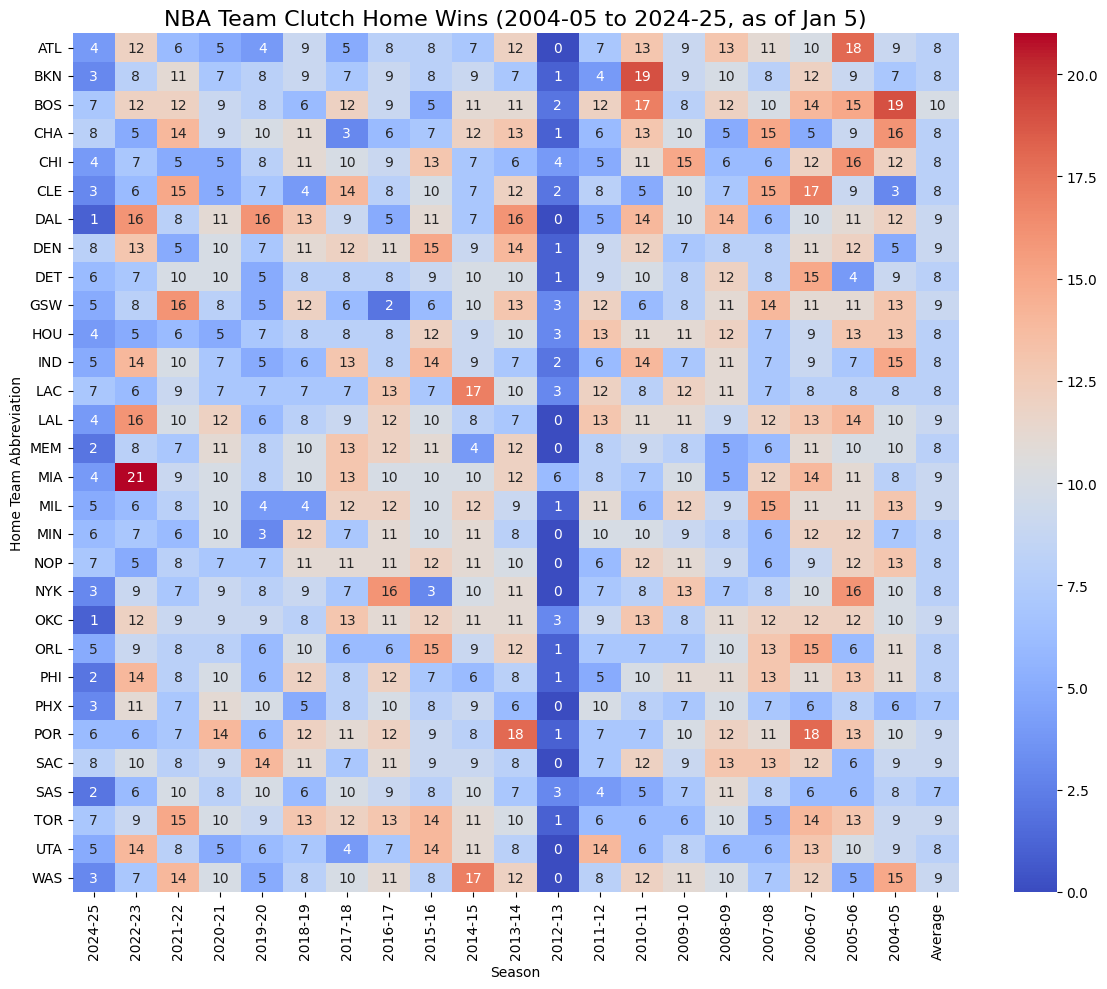

<Figure size 640x480 with 0 Axes>

In [ ]:
# Apply the function
#adjusted_df = adjust_charlotte_data(pt)
# Add an average column at the end of the heatmap
pt['Average'] = pt.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols = pt.columns.tolist()
cols = [col for col in cols if col != 'Average'] + ['Average']
pt = pt[cols]
# Output the result
print(pt)
# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, as of Jan 5)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

#not bad. issues with DEN and NOP since rebranding...Why's it missing?? DEN and MIN since 2012? Can rly perfect this and then send it off. Got p far, but 2012 season is still fkn weird.
#fixed this thanks to data bogue - issue is now 2012-13 season is missing a serious amount of data from the table data. Need to fix this.

In [ ]:
# Remove duplicate gameIDs from game_data_filtered
game_data_filtered = game_data_filtered.drop_duplicates(subset='gameId')

In [ ]:
 # next count games in 2012-13 season data - is this an issue for all data?
# Count unique game IDs in game_data_filtered by season
unique_game_ids_by_season = game_data_filtered.groupby('season')['gameId'].nunique()

# Print unique game IDs starting from the 2010-11 season to the end
print(unique_game_ids_by_season.loc['2010-11':])

season
2010-11    1422
2011-12    1104
2012-13     191
2013-14    1427
2014-15    1418
2015-16    1416
2016-17    1405
2017-18    1382
2018-19    1312
2019-20    1100
2020-21    1256
2021-22    1383
2022-23    1379
2024-25     586
nan-an     1338
Name: gameId, dtype: int64


In [ ]:
# Filter for rows where 'season' is 'nan-an'
nan_an_season_games = game_data_filtered[game_data_filtered['season'] == 'nan-an']

# Display the tail of the DataFrame
print(nan_an_season_games.tail())
# it isn't that the 12-13 games are being put into nan-an. I wonder why they are missing.

#  it is simply missing in the dataset! I can't fix this. I can only work with the data I have.

         gameId gameDate  hometeamCity hometeamName  hometeamId  awayteamCity  \
64447  24600083      NaT      New York       Knicks  1610612752        Boston   
64448  24600078      NaT        Boston      Celtics  1610612738      New York   
64449  24600076      NaT  Philadelphia     Warriors  1610612744      New York   
64450  24600063      NaT      New York       Knicks  1610612752  Philadelphia   
64451  24600052      NaT  Philadelphia     Warriors  1610612744        Boston   

      awayteamName  awayteamId  homeScore  awayScore  pointDifferential  \
64447      Celtics  1610612738         62         44                 18   
64448       Knicks  1610612752         65         90                -25   
64449       Knicks  1610612752         62         51                 11   
64450     Warriors  1610612744         64         60                  4   
64451      Celtics  1610612738         66         54                 12   

       season  
64447  nan-an  
64448  nan-an  
64449  nan-an 

season          2024-25  2022-23  2021-22  2020-21  2019-20  2018-19  2017-18  \
hometeamAbbrev                                                                  
ATL                   4       12        6        5        4        9        5   
BKN                   3        8       11        7        8        9        7   
BOS                   7       12       12        9        8        6       12   
CHA                   8        5       14        9       10       11        3   
CHI                   4        7        5        5        8       11       10   
CLE                   3        6       15        5        7        4       14   
DAL                   1       16        8       11       16       13        9   
DEN                   8       13        5       10        7       11       12   
DET                   6        7       10       10        5        8        8   
GSW                   5        8       16        8        5       12        6   
HOU                   4     

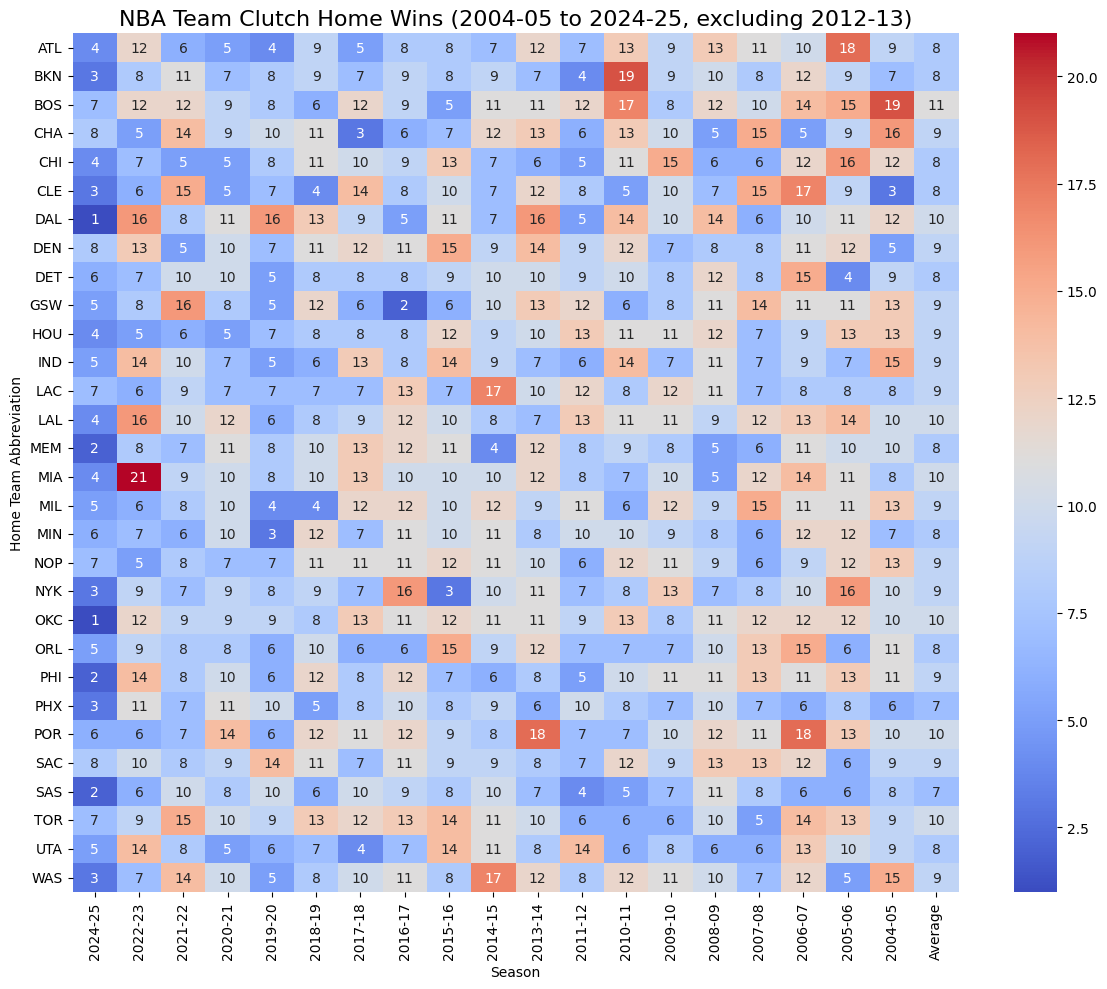

In [ ]:
# Exclude the 2012-13 season
table_excluded = table[table['season'] != '2012-13']

# Create a pivot table for the heatmap excluding the 2012-13 season
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Reverse the order of the seasons
pt_excluded = pt_excluded[sorted(pt_excluded.columns, reverse=True)]

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2024-25, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

season          2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  \
hometeamAbbrev                                                                  
ATL                   9       18       10       11       13        9       13   
BKN                   7        9       12        8       10        9       19   
BOS                  19       15       14       10       12        8       17   
CHA                  16        9        5       15        5       10       13   
CHI                  12       16       12        6        6       15       11   
CLE                   3        9       17       15        7       10        5   
DAL                  12       11       10        6       14       10       14   
DEN                   5       12       11        8        8        7       12   
DET                   9        4       15        8       12        8       10   
GSW                  13       11       11       14       11        8        6   
HOU                  13     

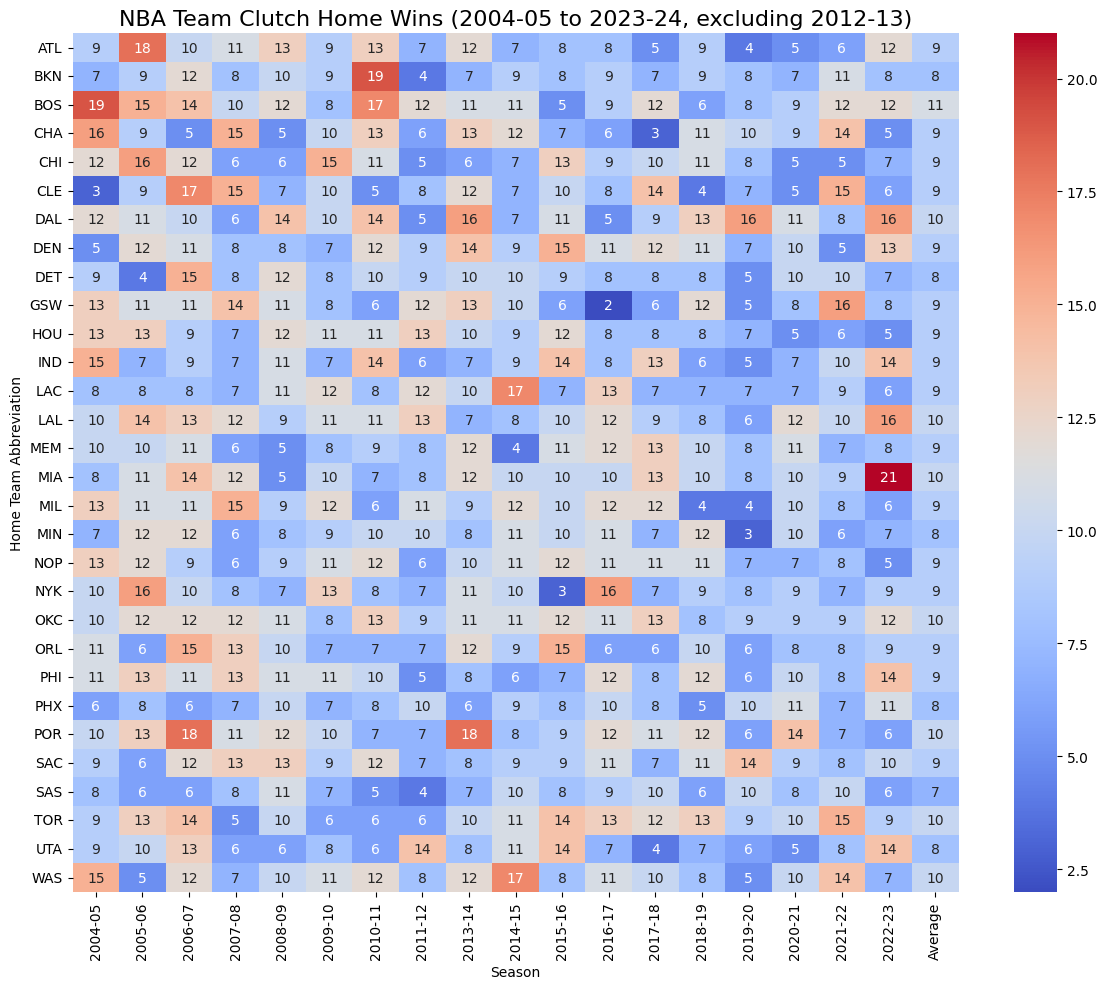

In [ ]:
# Exclude the 2012-13 and 2024-25 seasons
table_excluded = table[(table['season'] != '2012-13') & (table['season'] != '2024-25')]

# Create a pivot table for the heatmap excluding the 2012-13 and 2024-25 seasons
pt_excluded = table_excluded.pivot_table(index='hometeamAbbrev', columns='season', values='win', aggfunc='count', fill_value=0)

# Add an average column at the end of the heatmap
pt_excluded['Average'] = pt_excluded.mean(axis=1).astype(int)

# Reorder columns to place 'Average' at the end
cols_excluded = pt_excluded.columns.tolist()
cols_excluded = [col for col in cols_excluded if col != 'Average'] + ['Average']
pt_excluded = pt_excluded[cols_excluded]

# Output the result
print(pt_excluded)

# Create the heatmap with seasons on the x-axis and home team abbreviations on the y-axis
plt.figure(figsize=(12, 10))
sns.heatmap(pt_excluded, annot=True, cmap="coolwarm", fmt="d", cbar=True)

# Add titles and labels
plt.title('NBA Team Clutch Home Wins (2004-05 to 2023-24, excluding 2012-13)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Home Team Abbreviation')

plt.tight_layout()
plt.show()

In [ ]:
# Now trying to figure out duplicates in 04-05 NOP data - some show OKC Hor, others NOP.
# Filter for 2004-05 season and NOP home games
nop_2004_05_clutch_home_wins = table[(table['season'] == '2004-05') & (table['hometeamAbbrev'] == 'NOP') & (table['win'] == 1)]

# Display the result
print(nop_2004_05_clutch_home_wins)

         gameId   gameDate   hometeamCity hometeamName  hometeamId  \
24374  20400917 2005-03-13    New Orleans      Hornets  1610612740   
24540  20400760 2005-02-15    New Orleans      Hornets  1610612740   
24564  20400738 2005-02-12    New Orleans      Hornets  1610612740   
24678  20400632 2005-01-29    New Orleans      Hornets  1610612740   
24725  20400588 2005-01-23  Oklahoma City      Hornets  1610612740   
24749  20400565 2005-01-20    New Orleans      Hornets  1610612740   
24838  20400483 2005-01-09    New Orleans      Hornets  1610612740   

       awayteamCity awayteamName  awayteamId  homeScore  awayScore  \
24374     Milwaukee        Bucks  1610612749        111        107   
24540    Washington      Wizards  1610612764         98         96   
24564  Golden State     Warriors  1610612744        111        108   
24678  Philadelphia        76ers  1610612755         99         95   
24725   Los Angeles     Clippers  1610612746         88         85   
24749       Indiana

In [ ]:
mia_2022_23_clutch_home_wins = table[(table['season'] == '2022-23') & (table['hometeamAbbrev'] == 'MIA') & (table['win'] == 1)]

# Display the result
print(mia_2022_23_clutch_home_wins)

# Calculate the length of the new table
length_of_table = len(mia_2022_23_clutch_home_wins)
print(f"Length of the new table: {length_of_table}")

        gameId   gameDate hometeamCity hometeamName  hometeamId  \
604   42200206 2023-05-12        Miami         Heat  1610612748   
878   22201022 2023-03-13        Miami         Heat  1610612748   
900   22201000 2023-03-11        Miami         Heat  1610612748   
926   22200974 2023-03-07        Miami         Heat  1610612748   
1061  22200840 2023-02-11        Miami         Heat  1610612748   
1186  22200714 2023-01-25        Miami         Heat  1610612748   
1200  22200699 2023-01-22        Miami         Heat  1610612748   
1288  22200611 2023-01-11        Miami         Heat  1610612748   
1400  22200500 2022-12-27        Miami         Heat  1610612748   
1623  22200277 2022-11-26        Miami         Heat  1610612748   
1698  22200202 2022-11-15        Miami         Heat  1610612748   
1791  22200109 2022-11-02        Miami         Heat  1610612748   
1869  22200031 2022-10-23        Miami         Heat  1610612748   

       awayteamCity  awayteamName  awayteamId  homeScore  awa

No kernel connected